# IPL 2025: WAR Value Analysis - Wins Per Rupee

**Objective**: Identify which players provided the best value for money in IPL 2025 by analyzing WAR (Wins Above Replacement) relative to their auction prices.

**Key Metrics**:
- **WAR/Crore**: Wins contributed per crore spent
- **WAR/Match/Crore**: Value accounting for availability
- **Value Categories**: Bargains, Fair Value, Overvalued

---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Plotting setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Increase plot size
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Imports loaded")

✓ Imports loaded


## 1. Load 2025 WAR Data

In [2]:
# Load 2025 WAR results
results_dir = Path('../results/2025_season')

batter_war = pd.read_csv(results_dir / 'batter_war_2025.csv')
bowler_war = pd.read_csv(results_dir / 'bowler_war_2025.csv')

print(f"Loaded {len(batter_war)} batters, {len(bowler_war)} bowlers")
print(f"\nBatter columns: {list(batter_war.columns)}")
print(f"Bowler columns: {list(bowler_war.columns)}")

Loaded 166 batters, 128 bowlers

Batter columns: ['batter_id', 'batter_name', 'RAA', 'balls_faced', 'RAA_per_ball', 'VORP', 'WAR', 'WAR_per_ball']
Bowler columns: ['bowler_id', 'bowler_name', 'RAA', 'balls_bowled', 'RAA_per_ball', 'VORP', 'WAR', 'WAR_per_ball']


In [3]:
# Preview top performers
print("Top 10 Batters by WAR:")
display(batter_war.nlargest(10, 'WAR')[['batter_name', 'WAR', 'VORP', 'RAA', 'balls_faced']])

print("\nTop 10 Bowlers by WAR:")
display(bowler_war.nlargest(10, 'WAR')[['bowler_name', 'WAR', 'VORP', 'RAA', 'balls_bowled']])

Top 10 Batters by WAR:


,batter_name,WAR,VORP,RAA,balls_faced
0,Priyansh Arya,1.880232,201.880526,120.305414,317
1,SA Yadav,1.868321,200.601653,86.602364,443
2,SS Iyer,1.699279,182.451551,89.811046,360
3,P Simran Singh,1.576502,169.268966,72.511105,376
4,Abhishek Sharma,1.454505,156.170227,93.895221,242
5,N Pooran,1.426220,153.133254,77.219506,295
6,MR Marsh,1.343911,144.295672,38.788430,410
7,PD Salt,1.326228,142.397075,80.379404,241
8,YBK Jaiswal,1.260777,135.369654,42.729149,360
9,B Sai Sudharsan,1.250655,134.282839,3.299458,509



Top 10 Bowlers by WAR:


,bowler_name,WAR,VORP,RAA,balls_bowled
0,JJ Bumrah,1.593887,171.135632,102.875601,289
1,Kuldeep Yadav,1.492679,160.268925,83.742109,324
2,M Prasidh Krishna,1.350993,145.056125,59.081553,364
3,CV Varun,1.039262,111.585603,38.837889,308
4,Noor Ahmad,1.011046,108.555959,33.446306,318
5,SP Narine,1.009509,108.390945,43.437629,275
6,Arshdeep Singh,0.989061,106.195441,19.276094,368
7,M Pathirana,0.953810,102.410626,33.442014,292
8,DS Rathi,0.911136,97.828698,22.010463,321
9,HV Patel,0.864820,92.855713,25.304264,286


## 2. Load and Process Auction Price Data

Loading IPL 2025 auction prices and converting to standardized format (crores).

In [4]:
# Load auction data
auction_data = [
    # Chennai Super Kings (CSK)
    ("Chennai Super Kings", "Ruturaj Gaikwad", "18 Cr"),
    ("Chennai Super Kings", "Ravindra Jadeja", "18 Cr"),
    ("Chennai Super Kings", "Matheesha Pathirana", "13 Cr"),
    ("Chennai Super Kings", "Shivam Dube", "12 Cr"),
    ("Chennai Super Kings", "MS Dhoni", "4 Cr"),
    ("Chennai Super Kings", "Ravichandran Ashwin", "9.75 Cr"),
    ("Chennai Super Kings", "Noor Ahmad", "10 Cr"),
    ("Chennai Super Kings", "Devon Conway", "6.25 Cr"),
    ("Chennai Super Kings", "Khaleel Ahmed", "4.80 Cr"),
    ("Chennai Super Kings", "Rachin Ravindra", "4 Cr"),
    ("Chennai Super Kings", "Anshul Kamboj", "3.40 Cr"),
    ("Chennai Super Kings", "Rahul Tripathi", "3.40 Cr"),
    ("Chennai Super Kings", "Sam Curran", "2.40 Cr"),
    ("Chennai Super Kings", "Gurjapneet Singh", "2.20 Cr"),
    ("Chennai Super Kings", "Nathan Ellis", "2 Cr"),
    ("Chennai Super Kings", "Deepak Hooda", "1.70 Cr"),
    ("Chennai Super Kings", "Jamie Overton", "1.50 Cr"),
    ("Chennai Super Kings", "Vijay Shankar", "1.20 Cr"),
    ("Chennai Super Kings", "Mukesh Choudhary", "30 Lakh"),
    ("Chennai Super Kings", "Shaik Rasheed", "30 Lakh"),
    ("Chennai Super Kings", "Kamlesh Nagarkoti", "30 Lakh"),
    ("Chennai Super Kings", "Ramakrishna Ghosh", "30 Lakh"),
    ("Chennai Super Kings", "Shreyas Gopal", "30 Lakh"),
    ("Chennai Super Kings", "Vansh Bedi", "30 Lakh"),
    ("Chennai Super Kings", "Andre Siddarth", "30 Lakh"),

    # Delhi Capitals (DC)
    ("Delhi Capitals", "Axar Patel", "16.50 Cr"),
    ("Delhi Capitals", "Kuldeep Yadav", "13.25 Cr"),
    ("Delhi Capitals", "Tristan Stubbs", "10 Cr"),
    ("Delhi Capitals", "Abishek Porel", "4 Cr"),
    ("Delhi Capitals", "KL Rahul", "14 Cr"),
    ("Delhi Capitals", "Mitchell Starc", "11.75 Cr"),
    ("Delhi Capitals", "T Natarajan", "10.75 Cr"),
    ("Delhi Capitals", "Jake Fraser-McGurk", "9 Cr"),
    ("Delhi Capitals", "Mukesh Kumar", "8 Cr"),
    ("Delhi Capitals", "Harry Brook", "6.25 Cr"),
    ("Delhi Capitals", "Ashutosh Sharma", "3.80 Cr"),
    ("Delhi Capitals", "Mohit Sharma", "2.20 Cr"),
    ("Delhi Capitals", "Faf du Plessis", "2 Cr"),
    ("Delhi Capitals", "Sameer Rizvi", "95 Lakh"),
    ("Delhi Capitals", "Dushmantha Chameera", "75 Lakh"),
    ("Delhi Capitals", "Donovan Ferreira", "75 Lakh"),
    ("Delhi Capitals", "Karun Nair", "50 Lakh"),
    ("Delhi Capitals", "Vipraj Nigam", "50 Lakh"),
    ("Delhi Capitals", "Darshan Nalkande", "30 Lakh"),
    ("Delhi Capitals", "Ajay Mandal", "30 Lakh"),
    ("Delhi Capitals", "Manvanth Kumar", "30 Lakh"),
    ("Delhi Capitals", "Tripurana Vijay", "30 Lakh"),
    ("Delhi Capitals", "Madhav Tiwari", "30 Lakh"),
    ("Delhi Capitals", "Yuvraj Chaudhary", "30 Lakh"),

    # Gujarat Titans (GT)
    ("Gujarat Titans", "Rashid Khan", "18 Cr"),
    ("Gujarat Titans", "Shubman Gill", "16.50 Cr"),
    ("Gujarat Titans", "Sai Sudharsan", "8.50 Cr"),
    ("Gujarat Titans", "Rahul Tewatia", "4 Cr"),
    ("Gujarat Titans", "Shahrukh Khan", "4 Cr"),
    ("Gujarat Titans", "Jos Buttler", "15.75 Cr"),
    ("Gujarat Titans", "Mohammed Siraj", "12.25 Cr"),
    ("Gujarat Titans", "Kagiso Rabada", "10.75 Cr"),
    ("Gujarat Titans", "Prasidh Krishna", "9.50 Cr"),
    ("Gujarat Titans", "Mahipal Lomror", "1.70 Cr"),
    ("Gujarat Titans", "Sherfane Rutherford", "2.60 Cr"),
    ("Gujarat Titans", "Gerald Coetzee", "2.40 Cr"),
    ("Gujarat Titans", "Washington Sundar", "3.20 Cr"),
    ("Gujarat Titans", "Arshad Khan", "1.30 Cr"),
    ("Gujarat Titans", "Gurnoor Brar", "1.30 Cr"),
    ("Gujarat Titans", "Glenn Phillips", "2 Cr"),
    ("Gujarat Titans", "Ishant Sharma", "75 Lakh"),
    ("Gujarat Titans", "Jayant Yadav", "75 Lakh"),
    ("Gujarat Titans", "Karim Janat", "75 Lakh"),
    ("Gujarat Titans", "Kumar Kushagra", "65 Lakh"),
    ("Gujarat Titans", "Anuj Rawat", "30 Lakh"),
    ("Gujarat Titans", "Nishant Sindhu", "30 Lakh"),
    ("Gujarat Titans", "Manav Suthar", "30 Lakh"),
    ("Gujarat Titans", "Sai Kishore", "2 Cr"),
    ("Gujarat Titans", "Kulwant Khejroliya", "30 Lakh"),

    # Kolkata Knight Riders (KKR)
    ("Kolkata Knight Riders", "Rinku Singh", "13 Cr"),
    ("Kolkata Knight Riders", "Varun Chakaravarthy", "12 Cr"),
    ("Kolkata Knight Riders", "Sunil Narine", "12 Cr"),
    ("Kolkata Knight Riders", "Andre Russell", "12 Cr"),
    ("Kolkata Knight Riders", "Harshit Rana", "4 Cr"),
    ("Kolkata Knight Riders", "Ramandeep Singh", "4 Cr"),
    ("Kolkata Knight Riders", "Venkatesh Iyer", "23.75 Cr"),
    ("Kolkata Knight Riders", "Anrich Nortje", "6.50 Cr"),
    ("Kolkata Knight Riders", "Quinton de Kock", "3.60 Cr"),
    ("Kolkata Knight Riders", "Angkrish Raghuvanshi", "3 Cr"),
    ("Kolkata Knight Riders", "Spencer Johnson", "2.80 Cr"),
    ("Kolkata Knight Riders", "Rahmanullah Gurbaz", "2 Cr"),
    ("Kolkata Knight Riders", "Moeen Ali", "2 Cr"),
    ("Kolkata Knight Riders", "Vaibhav Arora", "1.80 Cr"),
    ("Kolkata Knight Riders", "Rovman Powell", "1.50 Cr"),
    ("Kolkata Knight Riders", "Ajinkya Rahane", "1.50 Cr"),
    ("Kolkata Knight Riders", "Manish Pandey", "75 Lakh"),
    ("Kolkata Knight Riders", "Umran Malik", "75 Lakh"),
    ("Kolkata Knight Riders", "Anukul Roy", "40 Lakh"),
    ("Kolkata Knight Riders", "Mayank Markande", "30 Lakh"),
    ("Kolkata Knight Riders", "Luvnith Sisodia", "30 Lakh"),

    # Lucknow Super Giants (LSG)
    ("Lucknow Super Giants", "Nicholas Pooran", "21 Cr"),
    ("Lucknow Super Giants", "Ravi Bishnoi", "11 Cr"),
    ("Lucknow Super Giants", "Mayank Yadav", "11 Cr"),
    ("Lucknow Super Giants", "Ayush Badoni", "4 Cr"),
    ("Lucknow Super Giants", "Mohsin Khan", "4 Cr"),
    ("Lucknow Super Giants", "Rishabh Pant", "27 Cr"),
    ("Lucknow Super Giants", "Avesh Khan", "9.75 Cr"),
    ("Lucknow Super Giants", "Akash Deep", "8 Cr"),
    ("Lucknow Super Giants", "David Miller", "7.50 Cr"),
    ("Lucknow Super Giants", "Abdul Samad", "4.20 Cr"),
    ("Lucknow Super Giants", "Mitchell Marsh", "3.40 Cr"),
    ("Lucknow Super Giants", "Shahbaz Ahmed", "2.40 Cr"),
    ("Lucknow Super Giants", "Aiden Markram", "2 Cr"),
    ("Lucknow Super Giants", "M. Siddharth", "75 Lakh"),
    ("Lucknow Super Giants", "Shamar Joseph", "75 Lakh"),
    ("Lucknow Super Giants", "Aryan Juyal", "30 Lakh"),
    ("Lucknow Super Giants", "Himmat Singh", "30 Lakh"),
    ("Lucknow Super Giants", "Arshin Kulkarni", "30 Lakh"),
    ("Lucknow Super Giants", "Rajvardhan Hangargekar", "30 Lakh"),
    ("Lucknow Super Giants", "Digvesh Singh", "30 Lakh"),
    ("Lucknow Super Giants", "Akash Singh", "30 Lakh"),
    ("Lucknow Super Giants", "Prince Yadav", "30 Lakh"),
    ("Lucknow Super Giants", "Yuvraj Singh", "30 Lakh"),
    ("Lucknow Super Giants", "Matthew Breetzke", "75 Lakh"),

    # Mumbai Indians (MI)
    ("Mumbai Indians", "Jasprit Bumrah", "18 Cr"),
    ("Mumbai Indians", "Suryakumar Yadav", "16.35 Cr"),
    ("Mumbai Indians", "Hardik Pandya", "16.35 Cr"),
    ("Mumbai Indians", "Rohit Sharma", "16.30 Cr"),
    ("Mumbai Indians", "Tilak Varma", "8 Cr"),
    ("Mumbai Indians", "Trent Boult", "12.50 Cr"),
    ("Mumbai Indians", "Deepak Chahar", "9.25 Cr"),
    ("Mumbai Indians", "Naman Dhir", "5.25 Cr"),
    ("Mumbai Indians", "Allah Ghazanfar", "4.80 Cr"),
    ("Mumbai Indians", "Will Jacks", "5.25 Cr"),
    ("Mumbai Indians", "Mitchell Santner", "2 Cr"),
    ("Mumbai Indians", "Ryan Rickelton", "1 Cr"),
    ("Mumbai Indians", "Lizaad Williams", "75 Lakh"),
    ("Mumbai Indians", "Reece Topley", "75 Lakh"),
    ("Mumbai Indians", "Robin Minz", "65 Lakh"),
    ("Mumbai Indians", "Karn Sharma", "50 Lakh"),
    ("Mumbai Indians", "Arjun Tendulkar", "30 Lakh"),
    ("Mumbai Indians", "Ashwani Kumar", "30 Lakh"),
    ("Mumbai Indians", "Bevon Jacobs", "30 Lakh"),
    ("Mumbai Indians", "Raj Angad Bawa", "30 Lakh"),
    ("Mumbai Indians", "Shrijith Krishnan", "30 Lakh"),
    ("Mumbai Indians", "V. Satyanarayana Raju", "30 Lakh"),
    ("Mumbai Indians", "Vignesh Puthur", "30 Lakh"),

    # Punjab Kings (PBKS)
    ("Punjab Kings", "Shashank Singh", "5.50 Cr"),
    ("Punjab Kings", "Prabhsimran Singh", "4 Cr"),
    ("Punjab Kings", "Shreyas Iyer", "26.75 Cr"),
    ("Punjab Kings", "Arshdeep Singh", "18 Cr"),
    ("Punjab Kings", "Yuzvendra Chahal", "18 Cr"),
    ("Punjab Kings", "Marcus Stoinis", "11 Cr"),
    ("Punjab Kings", "Glenn Maxwell", "4.20 Cr"),
    ("Punjab Kings", "Nehal Wadhera", "4.20 Cr"),
    ("Punjab Kings", "Marco Jansen", "7 Cr"),
    ("Punjab Kings", "Josh Inglis", "2.60 Cr"),
    ("Punjab Kings", "Azmatullah Omarzai", "2.40 Cr"),
    ("Punjab Kings", "Lockie Ferguson", "2 Cr"),
    ("Punjab Kings", "Vijaykumar Vyshak", "1.80 Cr"),
    ("Punjab Kings", "Yash Thakur", "1.60 Cr"),
    ("Punjab Kings", "Harpreet Brar", "1.50 Cr"),
    ("Punjab Kings", "Aaron Hardie", "1.25 Cr"),
    ("Punjab Kings", "Vishnu Vinod", "95 Lakh"),
    ("Punjab Kings", "Kuldeep Sen", "80 Lakh"),
    ("Punjab Kings", "Xavier Bartlett", "75 Lakh"),
    ("Punjab Kings", "Harnoor Pannu", "30 Lakh"),
    ("Punjab Kings", "Priyansh Arya", "3.80 Cr"),
    ("Punjab Kings", "Musheer Khan", "30 Lakh"),
    ("Punjab Kings", "Suryansh Shedge", "30 Lakh"),
    ("Punjab Kings", "Pravin Dubey", "80 Lakh"),

    # Rajasthan Royals (RR)
    ("Rajasthan Royals", "Sanju Samson", "18 Cr"),
    ("Rajasthan Royals", "Yashasvi Jaiswal", "18 Cr"),
    ("Rajasthan Royals", "Riyan Parag", "14 Cr"),
    ("Rajasthan Royals", "Dhruv Jurel", "14 Cr"),
    ("Rajasthan Royals", "Shimron Hetmyer", "11 Cr"),
    ("Rajasthan Royals", "Sandeep Sharma", "4 Cr"),
    ("Rajasthan Royals", "Jofra Archer", "12.50 Cr"),
    ("Rajasthan Royals", "Tushar Deshpande", "6.50 Cr"),
    ("Rajasthan Royals", "Wanindu Hasaranga", "5.25 Cr"),
    ("Rajasthan Royals", "Maheesh Theekshana", "4.40 Cr"),
    ("Rajasthan Royals", "Nitish Rana", "4.20 Cr"),
    ("Rajasthan Royals", "Fazalhaq Farooqi", "2 Cr"),
    ("Rajasthan Royals", "Kwena Maphaka", "1.50 Cr"),
    ("Rajasthan Royals", "Akash Madhwal", "1.20 Cr"),
    ("Rajasthan Royals", "Vaibhav Suryavanshi", "1.10 Cr"),
    ("Rajasthan Royals", "Shubham Dubey", "80 Lakh"),
    ("Rajasthan Royals", "Yudhvir Singh", "35 Lakh"),
    ("Rajasthan Royals", "Kumar Kartikeya", "30 Lakh"),
    ("Rajasthan Royals", "Kunal Rathore", "30 Lakh"),
    ("Rajasthan Royals", "Ashok Sharma", "30 Lakh"),
    ("Rajasthan Royals", "Kartik Tyagi", "60 Lakh"),

    # Royal Challengers Bengaluru (RCB)
    ("Royal Challengers Bengaluru", "Virat Kohli", "21 Cr"),
    ("Royal Challengers Bengaluru", "Rajat Patidar", "11 Cr"),
    ("Royal Challengers Bengaluru", "Yash Dayal", "5 Cr"),
    ("Royal Challengers Bengaluru", "Josh Hazlewood", "12.50 Cr"),
    ("Royal Challengers Bengaluru", "Phil Salt", "11.50 Cr"),
    ("Royal Challengers Bengaluru", "Jitesh Sharma", "11 Cr"),
    ("Royal Challengers Bengaluru", "Bhuvneshwar Kumar", "10.75 Cr"),
    ("Royal Challengers Bengaluru", "Liam Livingstone", "8.75 Cr"),
    ("Royal Challengers Bengaluru", "Rasikh Dar", "6 Cr"),
    ("Royal Challengers Bengaluru", "Krunal Pandya", "5.75 Cr"),
    ("Royal Challengers Bengaluru", "Suyash Sharma", "2.60 Cr"),
    ("Royal Challengers Bengaluru", "Devdutt Padikkal", "2 Cr"),
    ("Royal Challengers Bengaluru", "Nuwan Thushara", "1.60 Cr"),
    ("Royal Challengers Bengaluru", "Tim David", "3 Cr"),
    ("Royal Challengers Bengaluru", "Romario Shepherd", "1.50 Cr"),
    ("Royal Challengers Bengaluru", "Jacob Bethell", "2.60 Cr"),
    ("Royal Challengers Bengaluru", "Swapnil Singh", "50 Lakh"),
    ("Royal Challengers Bengaluru", "Manoj Bhandage", "30 Lakh"),

    # Sunrisers Hyderabad (SRH)
    ("Sunrisers Hyderabad", "Heinrich Klaasen", "23 Cr"),
    ("Sunrisers Hyderabad", "Pat Cummins", "18 Cr"),
    ("Sunrisers Hyderabad", "Abhishek Sharma", "14 Cr"),
    ("Sunrisers Hyderabad", "Travis Head", "14 Cr"),
    ("Sunrisers Hyderabad", "Nitish Kumar Reddy", "6 Cr"),
    ("Sunrisers Hyderabad", "Ishan Kishan", "11.25 Cr"),
    ("Sunrisers Hyderabad", "Mohammed Shami", "10 Cr"),
    ("Sunrisers Hyderabad", "Harshal Patel", "8 Cr"),
    ("Sunrisers Hyderabad", "Abhinav Manohar", "3.20 Cr"),
    ("Sunrisers Hyderabad", "Rahul Chahar", "3.20 Cr"),
    ("Sunrisers Hyderabad", "Adam Zampa", "2.40 Cr"),
    ("Sunrisers Hyderabad", "Simarjeet Singh", "1.50 Cr"),
    ("Sunrisers Hyderabad", "Brydon Carse", "1 Cr"),
    ("Sunrisers Hyderabad", "Jaydev Unadkat", "1 Cr"),
    ("Sunrisers Hyderabad", "Kamindu Mendis", "75 Lakh"),
    ("Sunrisers Hyderabad", "Zeeshan Ansari", "40 Lakh"),
    ("Sunrisers Hyderabad", "Atharva Taide", "30 Lakh"),
    ("Sunrisers Hyderabad", "Aniket Verma", "30 Lakh"),
    ("Sunrisers Hyderabad", "Sachin Baby", "30 Lakh"),
    ("Sunrisers Hyderabad", "Eshan Malinga", "1.20 Cr"),
    ("Sunrisers Hyderabad", "Smaran Ravichandran", "30 Lakh"),
    ("Sunrisers Hyderabad", "Harsh Dubey", "30 Lakh")
]

auction_df = pd.DataFrame(auction_data, columns=["Team", "Player Name", "Price"])

print(f"✓ Loaded {len(auction_df)} player auction prices")
print(f"\nTeams: {auction_df['Team'].nunique()}")
auction_df.head(10)

✓ Loaded 227 player auction prices

Teams: 10


,Team,Player Name,Price
0,Chennai Super Kings,Ruturaj Gaikwad,18 Cr
1,Chennai Super Kings,Ravindra Jadeja,18 Cr
2,Chennai Super Kings,Matheesha Pathirana,13 Cr
3,Chennai Super Kings,Shivam Dube,12 Cr
4,Chennai Super Kings,MS Dhoni,4 Cr
5,Chennai Super Kings,Ravichandran Ashwin,9.75 Cr
6,Chennai Super Kings,Noor Ahmad,10 Cr
7,Chennai Super Kings,Devon Conway,6.25 Cr
8,Chennai Super Kings,Khaleel Ahmed,4.80 Cr
9,Chennai Super Kings,Rachin Ravindra,4 Cr


In [5]:
# Convert price strings to numeric crores
def parse_price(price_str):
    """
    Convert price string to numeric crores.
    Examples: '18 Cr' -> 18.0, '30 Lakh' -> 0.30, '95 Lakh' -> 0.95
    """
    price_str = price_str.strip()
    
    if 'Cr' in price_str:
        # Already in crores
        return float(price_str.replace('Cr', '').strip())
    elif 'Lakh' in price_str:
        # Convert lakhs to crores (1 Cr = 100 Lakh)
        lakh_value = float(price_str.replace('Lakh', '').strip())
        return lakh_value / 100.0
    else:
        # Assume it's already numeric
        return float(price_str)

auction_df['auction_price_cr'] = auction_df['Price'].apply(parse_price)

print("Price conversion summary:")
print(f"  Min:    ₹{auction_df['auction_price_cr'].min():.2f} Cr")
print(f"  Max:    ₹{auction_df['auction_price_cr'].max():.2f} Cr")
print(f"  Median: ₹{auction_df['auction_price_cr'].median():.2f} Cr")
print(f"  Mean:   ₹{auction_df['auction_price_cr'].mean():.2f} Cr")

auction_df[['Player Name', 'Price', 'auction_price_cr']].head(10)

Price conversion summary:
  Min:    ₹0.30 Cr
  Max:    ₹27.00 Cr
  Median: ₹2.40 Cr
  Mean:   ₹5.21 Cr


,Player Name,Price,auction_price_cr
0,Ruturaj Gaikwad,18 Cr,18.00
1,Ravindra Jadeja,18 Cr,18.00
2,Matheesha Pathirana,13 Cr,13.00
3,Shivam Dube,12 Cr,12.00
4,MS Dhoni,4 Cr,4.00
5,Ravichandran Ashwin,9.75 Cr,9.75
6,Noor Ahmad,10 Cr,10.00
7,Devon Conway,6.25 Cr,6.25
8,Khaleel Ahmed,4.80 Cr,4.80
9,Rachin Ravindra,4 Cr,4.00


## 3. Merge WAR Data with Auction Prices

In [6]:
# Normalize player names for matching
def normalize_name(name):
    """Normalize player names for better matching."""
    if pd.isna(name):
        return name
    # Remove extra spaces, convert to title case
    return ' '.join(name.strip().split())

auction_df['player_name_normalized'] = auction_df['Player Name'].apply(normalize_name)
batter_war['player_name_normalized'] = batter_war['batter_name'].apply(normalize_name)
bowler_war['player_name_normalized'] = bowler_war['bowler_name'].apply(normalize_name)

# Create auction price lookup dictionary
auction_lookup = dict(zip(auction_df['player_name_normalized'], 
                          auction_df['auction_price_cr']))
team_lookup = dict(zip(auction_df['player_name_normalized'], 
                       auction_df['Team']))

print(f"✓ Created lookup for {len(auction_lookup)} players")

✓ Created lookup for 227 players


In [7]:
# Add auction prices to batter data
batter_war['auction_price_cr'] = batter_war['player_name_normalized'].map(auction_lookup)
batter_war['team'] = batter_war['player_name_normalized'].map(team_lookup)
batter_war['role'] = 'Batter'
batter_war['player_name'] = batter_war['batter_name']
batter_war['balls'] = batter_war['balls_faced']

# Add auction prices to bowler data
bowler_war['auction_price_cr'] = bowler_war['player_name_normalized'].map(auction_lookup)
bowler_war['team'] = bowler_war['player_name_normalized'].map(team_lookup)
bowler_war['role'] = 'Bowler'
bowler_war['player_name'] = bowler_war['bowler_name']
bowler_war['balls'] = bowler_war['balls_bowled']

# Combine datasets
batter_subset = batter_war[['player_name', 'WAR', 'VORP', 'RAA', 'balls', 
                             'auction_price_cr', 'team', 'role']]
bowler_subset = bowler_war[['player_name', 'WAR', 'VORP', 'RAA', 'balls', 
                             'auction_price_cr', 'team', 'role']]

all_players = pd.concat([batter_subset, bowler_subset], ignore_index=True)

# Filter to players with auction data
players_with_prices = all_players[all_players['auction_price_cr'].notna()].copy()

print(f"Total players: {len(all_players)}")
print(f"Players with auction prices: {len(players_with_prices)}")
print(f"Missing prices: {len(all_players) - len(players_with_prices)}")

if len(all_players) - len(players_with_prices) > 0:
    print("\nPlayers missing auction data (top 30 by WAR):")
    missing = all_players[all_players['auction_price_cr'].isna()].nlargest(30, 'WAR')
    display(missing[['player_name', 'WAR', 'role']])

Total players: 294
Players with auction prices: 81
Missing prices: 213

Players missing auction data (top 30 by WAR):


,player_name,WAR,role
1,SA Yadav,1.868321,Batter
2,SS Iyer,1.699279,Batter
166,JJ Bumrah,1.593887,Bowler
3,P Simran Singh,1.576502,Batter
5,N Pooran,1.426220,Batter
168,M Prasidh Krishna,1.350993,Bowler
6,MR Marsh,1.343911,Batter
7,PD Salt,1.326228,Batter
8,YBK Jaiswal,1.260777,Batter
9,B Sai Sudharsan,1.250655,Batter


## 4. Calculate Value Metrics

In [8]:
# Calculate WAR per crore
players_with_prices['war_per_crore'] = players_with_prices['WAR'] / players_with_prices['auction_price_cr']

# Estimate matches played (rough approximation based on balls)
# Average batter faces ~12-15 balls per match, bowler bowls ~20-24 balls per match
players_with_prices['est_matches'] = players_with_prices.apply(
    lambda row: row['balls'] / 13 if row['role'] == 'Batter' else row['balls'] / 22,
    axis=1
)

# WAR per match
players_with_prices['war_per_match'] = players_with_prices['WAR'] / players_with_prices['est_matches']

# WAR per crore per match (efficiency metric)
players_with_prices['war_per_cr_per_match'] = players_with_prices['war_per_match'] / players_with_prices['auction_price_cr']

# VORP per crore
players_with_prices['vorp_per_crore'] = players_with_prices['VORP'] / players_with_prices['auction_price_cr']

print("✓ Value metrics calculated")
print(f"\nColumns: {list(players_with_prices.columns)}")

✓ Value metrics calculated

Columns: ['player_name', 'WAR', 'VORP', 'RAA', 'balls', 'auction_price_cr', 'team', 'role', 'war_per_crore', 'est_matches', 'war_per_match', 'war_per_cr_per_match', 'vorp_per_crore']


In [9]:
# Summary statistics
print("Value Metric Distributions:")
print("="*60)
print(f"\nWAR/Crore:")
print(players_with_prices['war_per_crore'].describe())

print(f"\nWAR/Match:")
print(players_with_prices['war_per_match'].describe())

print(f"\nAuction Price (Cr):")
print(players_with_prices['auction_price_cr'].describe())

Value Metric Distributions:

WAR/Crore:
count    81.000000
mean      0.071491
std       0.290725
min      -0.472126
25%      -0.004452
50%       0.028310
75%       0.099680
max       2.064997
Name: war_per_crore, dtype: float64

WAR/Match:
count    81.000000
mean     -0.006639
std       0.120504
min      -0.706094
25%      -0.022892
50%       0.020057
75%       0.037891
max       0.242915
Name: war_per_match, dtype: float64

Auction Price (Cr):
count    81.000000
mean      5.713580
std       5.296249
min       0.300000
25%       1.500000
50%       4.000000
75%      10.000000
max      18.000000
Name: auction_price_cr, dtype: float64


## 5. Top Value Players - Overall Rankings

In [10]:
# Top 20 players by WAR/Crore (minimum 0.5 WAR to filter out noise)
qualified = players_with_prices[players_with_prices['WAR'] >= 0.5].copy()

print("TOP 20 PLAYERS BY VALUE (WAR/Crore)")
print("="*80)
print("Minimum 0.5 WAR to qualify\n")

top_value = qualified.nlargest(20, 'war_per_crore')
display(top_value[['player_name', 'team', 'role', 'WAR', 'auction_price_cr', 'war_per_crore', 
                    'est_matches', 'war_per_match']].round(3))

TOP 20 PLAYERS BY VALUE (WAR/Crore)
Minimum 0.5 WAR to qualify



,player_name,team,role,WAR,auction_price_cr,war_per_crore,est_matches,war_per_match
33,Aniket Verma,Sunrisers Hyderabad,Batter,0.619,0.30,2.065,11.385,0.054
0,Priyansh Arya,Punjab Kings,Batter,1.880,3.80,0.495,24.385,0.077
180,Sandeep Sharma,Rajasthan Royals,Bowler,0.721,4.00,0.180,11.045,0.065
23,Naman Dhir,Mumbai Indians,Batter,0.833,5.25,0.159,10.923,0.076
30,Abishek Porel,Delhi Capitals,Batter,0.632,4.00,0.158,16.692,0.038
21,Shashank Singh,Punjab Kings,Batter,0.856,5.50,0.156,18.308,0.047
167,Kuldeep Yadav,Delhi Capitals,Bowler,1.493,13.25,0.113,14.727,0.101
4,Abhishek Sharma,Sunrisers Hyderabad,Batter,1.455,14.00,0.104,18.615,0.078
170,Noor Ahmad,Chennai Super Kings,Bowler,1.011,10.00,0.101,14.455,0.070
11,KL Rahul,Delhi Capitals,Batter,1.168,14.00,0.083,28.923,0.040


In [11]:
# Bottom 20 - Worst value (overpaid players)
print("\nBOTTOM 20 PLAYERS BY VALUE (Overpaid)")
print("="*80)

# Filter to players who cost at least 2 Cr (to avoid minimum salary players)
expensive = players_with_prices[players_with_prices['auction_price_cr'] >= 2.0].copy()
worst_value = expensive.nsmallest(20, 'war_per_crore')
display(worst_value[['player_name', 'team', 'role', 'WAR', 'auction_price_cr', 'war_per_crore', 
                      'est_matches', 'war_per_match']].round(3))


BOTTOM 20 PLAYERS BY VALUE (Overpaid)


,player_name,team,role,WAR,auction_price_cr,war_per_crore,est_matches,war_per_match
293,Fazalhaq Farooqi,Rajasthan Royals,Bowler,-0.347,2.00,-0.173,4.727,-0.073
290,Mohammed Shami,Sunrisers Hyderabad,Bowler,-0.195,10.00,-0.019,8.500,-0.023
285,Ravi Bishnoi,Lucknow Super Giants,Bowler,-0.111,11.00,-0.010,10.591,-0.010
265,Abdul Samad,Lucknow Super Giants,Bowler,-0.029,4.20,-0.007,0.091,-0.316
158,Noor Ahmad,Chennai Super Kings,Batter,-0.065,10.00,-0.006,1.308,-0.050
131,Shahbaz Ahmed,Lucknow Super Giants,Batter,-0.015,2.40,-0.006,0.615,-0.024
137,Yash Dayal,Royal Challengers Bengaluru,Batter,-0.026,5.00,-0.005,0.615,-0.042
263,Shashank Singh,Punjab Kings,Bowler,-0.024,5.50,-0.004,0.545,-0.045
272,T Natarajan,Delhi Capitals,Bowler,-0.042,10.75,-0.004,1.136,-0.037
139,Ravi Bishnoi,Lucknow Super Giants,Batter,-0.026,11.00,-0.002,1.231,-0.021


## 6. Value Analysis by Role

In [12]:
# Best value batters
print("TOP 15 VALUE BATTERS (WAR/Crore)")
print("="*80)

batters_qualified = qualified[qualified['role'] == 'Batter']
top_batter_value = batters_qualified.nlargest(15, 'war_per_crore')
display(top_batter_value[['player_name', 'team', 'WAR', 'auction_price_cr', 'war_per_crore', 
                           'balls', 'war_per_match']].round(3))

TOP 15 VALUE BATTERS (WAR/Crore)


,player_name,team,WAR,auction_price_cr,war_per_crore,balls,war_per_match
33,Aniket Verma,Sunrisers Hyderabad,0.619,0.30,2.065,148,0.054
0,Priyansh Arya,Punjab Kings,1.880,3.80,0.495,317,0.077
23,Naman Dhir,Mumbai Indians,0.833,5.25,0.159,142,0.076
30,Abishek Porel,Delhi Capitals,0.632,4.00,0.158,217,0.038
21,Shashank Singh,Punjab Kings,0.856,5.50,0.156,238,0.047
4,Abhishek Sharma,Sunrisers Hyderabad,1.455,14.00,0.104,242,0.078
11,KL Rahul,Delhi Capitals,1.168,14.00,0.083,376,0.040
26,Ishan Kishan,Sunrisers Hyderabad,0.672,11.25,0.060,246,0.036
16,Shubman Gill,Gujarat Titans,0.932,16.50,0.057,435,0.028
32,Dhruv Jurel,Rajasthan Royals,0.630,14.00,0.045,219,0.037


In [13]:
# Best value bowlers
print("TOP 15 VALUE BOWLERS (WAR/Crore)")
print("="*80)

bowlers_qualified = qualified[qualified['role'] == 'Bowler']
top_bowler_value = bowlers_qualified.nlargest(15, 'war_per_crore')
display(top_bowler_value[['player_name', 'team', 'WAR', 'auction_price_cr', 'war_per_crore', 
                           'balls', 'war_per_match']].round(3))

TOP 15 VALUE BOWLERS (WAR/Crore)


,player_name,team,WAR,auction_price_cr,war_per_crore,balls,war_per_match
180,Sandeep Sharma,Rajasthan Royals,0.721,4.00,0.180,243,0.065
167,Kuldeep Yadav,Delhi Capitals,1.493,13.25,0.113,324,0.101
170,Noor Ahmad,Chennai Super Kings,1.011,10.00,0.101,318,0.070
183,Mohammed Siraj,Gujarat Titans,0.684,12.25,0.056,367,0.041
172,Arshdeep Singh,Punjab Kings,0.989,18.00,0.055,368,0.059
191,Rashid Khan,Gujarat Titans,0.510,18.00,0.028,336,0.033


## 7. Value Categories Classification

In [14]:
# Define value categories based on WAR/Crore percentiles
p75 = qualified['war_per_crore'].quantile(0.75)
p50 = qualified['war_per_crore'].quantile(0.50)
p25 = qualified['war_per_crore'].quantile(0.25)

print(f"WAR/Crore Percentiles:")
print(f"  75th: {p75:.3f}")
print(f"  50th: {p50:.3f}")
print(f"  25th: {p25:.3f}")

def categorize_value(war_per_crore):
    if war_per_crore >= p75:
        return 'Bargain'
    elif war_per_crore >= p50:
        return 'Good Value'
    elif war_per_crore >= p25:
        return 'Fair Value'
    else:
        return 'Overvalued'

qualified['value_category'] = qualified['war_per_crore'].apply(categorize_value)

print("\nValue Category Distribution:")
print(qualified['value_category'].value_counts())

WAR/Crore Percentiles:
  75th: 0.158
  50th: 0.102
  25th: 0.056

Value Category Distribution:
value_category
Bargain       4
Good Value    4
Fair Value    4
Overvalued    4
Name: count, dtype: int64


In [15]:
# Show players in each category
for category in ['Bargain', 'Good Value', 'Fair Value', 'Overvalued']:
    print(f"\n{category.upper()} PLAYERS")
    print("="*80)
    category_players = qualified[qualified['value_category'] == category]
    display(category_players.nlargest(10, 'WAR')[['player_name', 'team', 'role', 'WAR', 
                                                    'auction_price_cr', 'war_per_crore']].round(3))


BARGAIN PLAYERS


,player_name,team,role,WAR,auction_price_cr,war_per_crore
0,Priyansh Arya,Punjab Kings,Batter,1.880,3.80,0.495
23,Naman Dhir,Mumbai Indians,Batter,0.833,5.25,0.159
180,Sandeep Sharma,Rajasthan Royals,Bowler,0.721,4.00,0.180
33,Aniket Verma,Sunrisers Hyderabad,Batter,0.619,0.30,2.065



GOOD VALUE PLAYERS


,player_name,team,role,WAR,auction_price_cr,war_per_crore
167,Kuldeep Yadav,Delhi Capitals,Bowler,1.493,13.25,0.113
4,Abhishek Sharma,Sunrisers Hyderabad,Batter,1.455,14.00,0.104
21,Shashank Singh,Punjab Kings,Batter,0.856,5.50,0.156
30,Abishek Porel,Delhi Capitals,Batter,0.632,4.00,0.158



FAIR VALUE PLAYERS


,player_name,team,role,WAR,auction_price_cr,war_per_crore
11,KL Rahul,Delhi Capitals,Batter,1.168,14.00,0.083
170,Noor Ahmad,Chennai Super Kings,Bowler,1.011,10.00,0.101
16,Shubman Gill,Gujarat Titans,Batter,0.932,16.50,0.057
26,Ishan Kishan,Sunrisers Hyderabad,Batter,0.672,11.25,0.060



OVERVALUED PLAYERS


,player_name,team,role,WAR,auction_price_cr,war_per_crore
172,Arshdeep Singh,Punjab Kings,Bowler,0.989,18.00,0.055
183,Mohammed Siraj,Gujarat Titans,Bowler,0.684,12.25,0.056
32,Dhruv Jurel,Rajasthan Royals,Batter,0.630,14.00,0.045
191,Rashid Khan,Gujarat Titans,Bowler,0.510,18.00,0.028


## 8. Visualizations

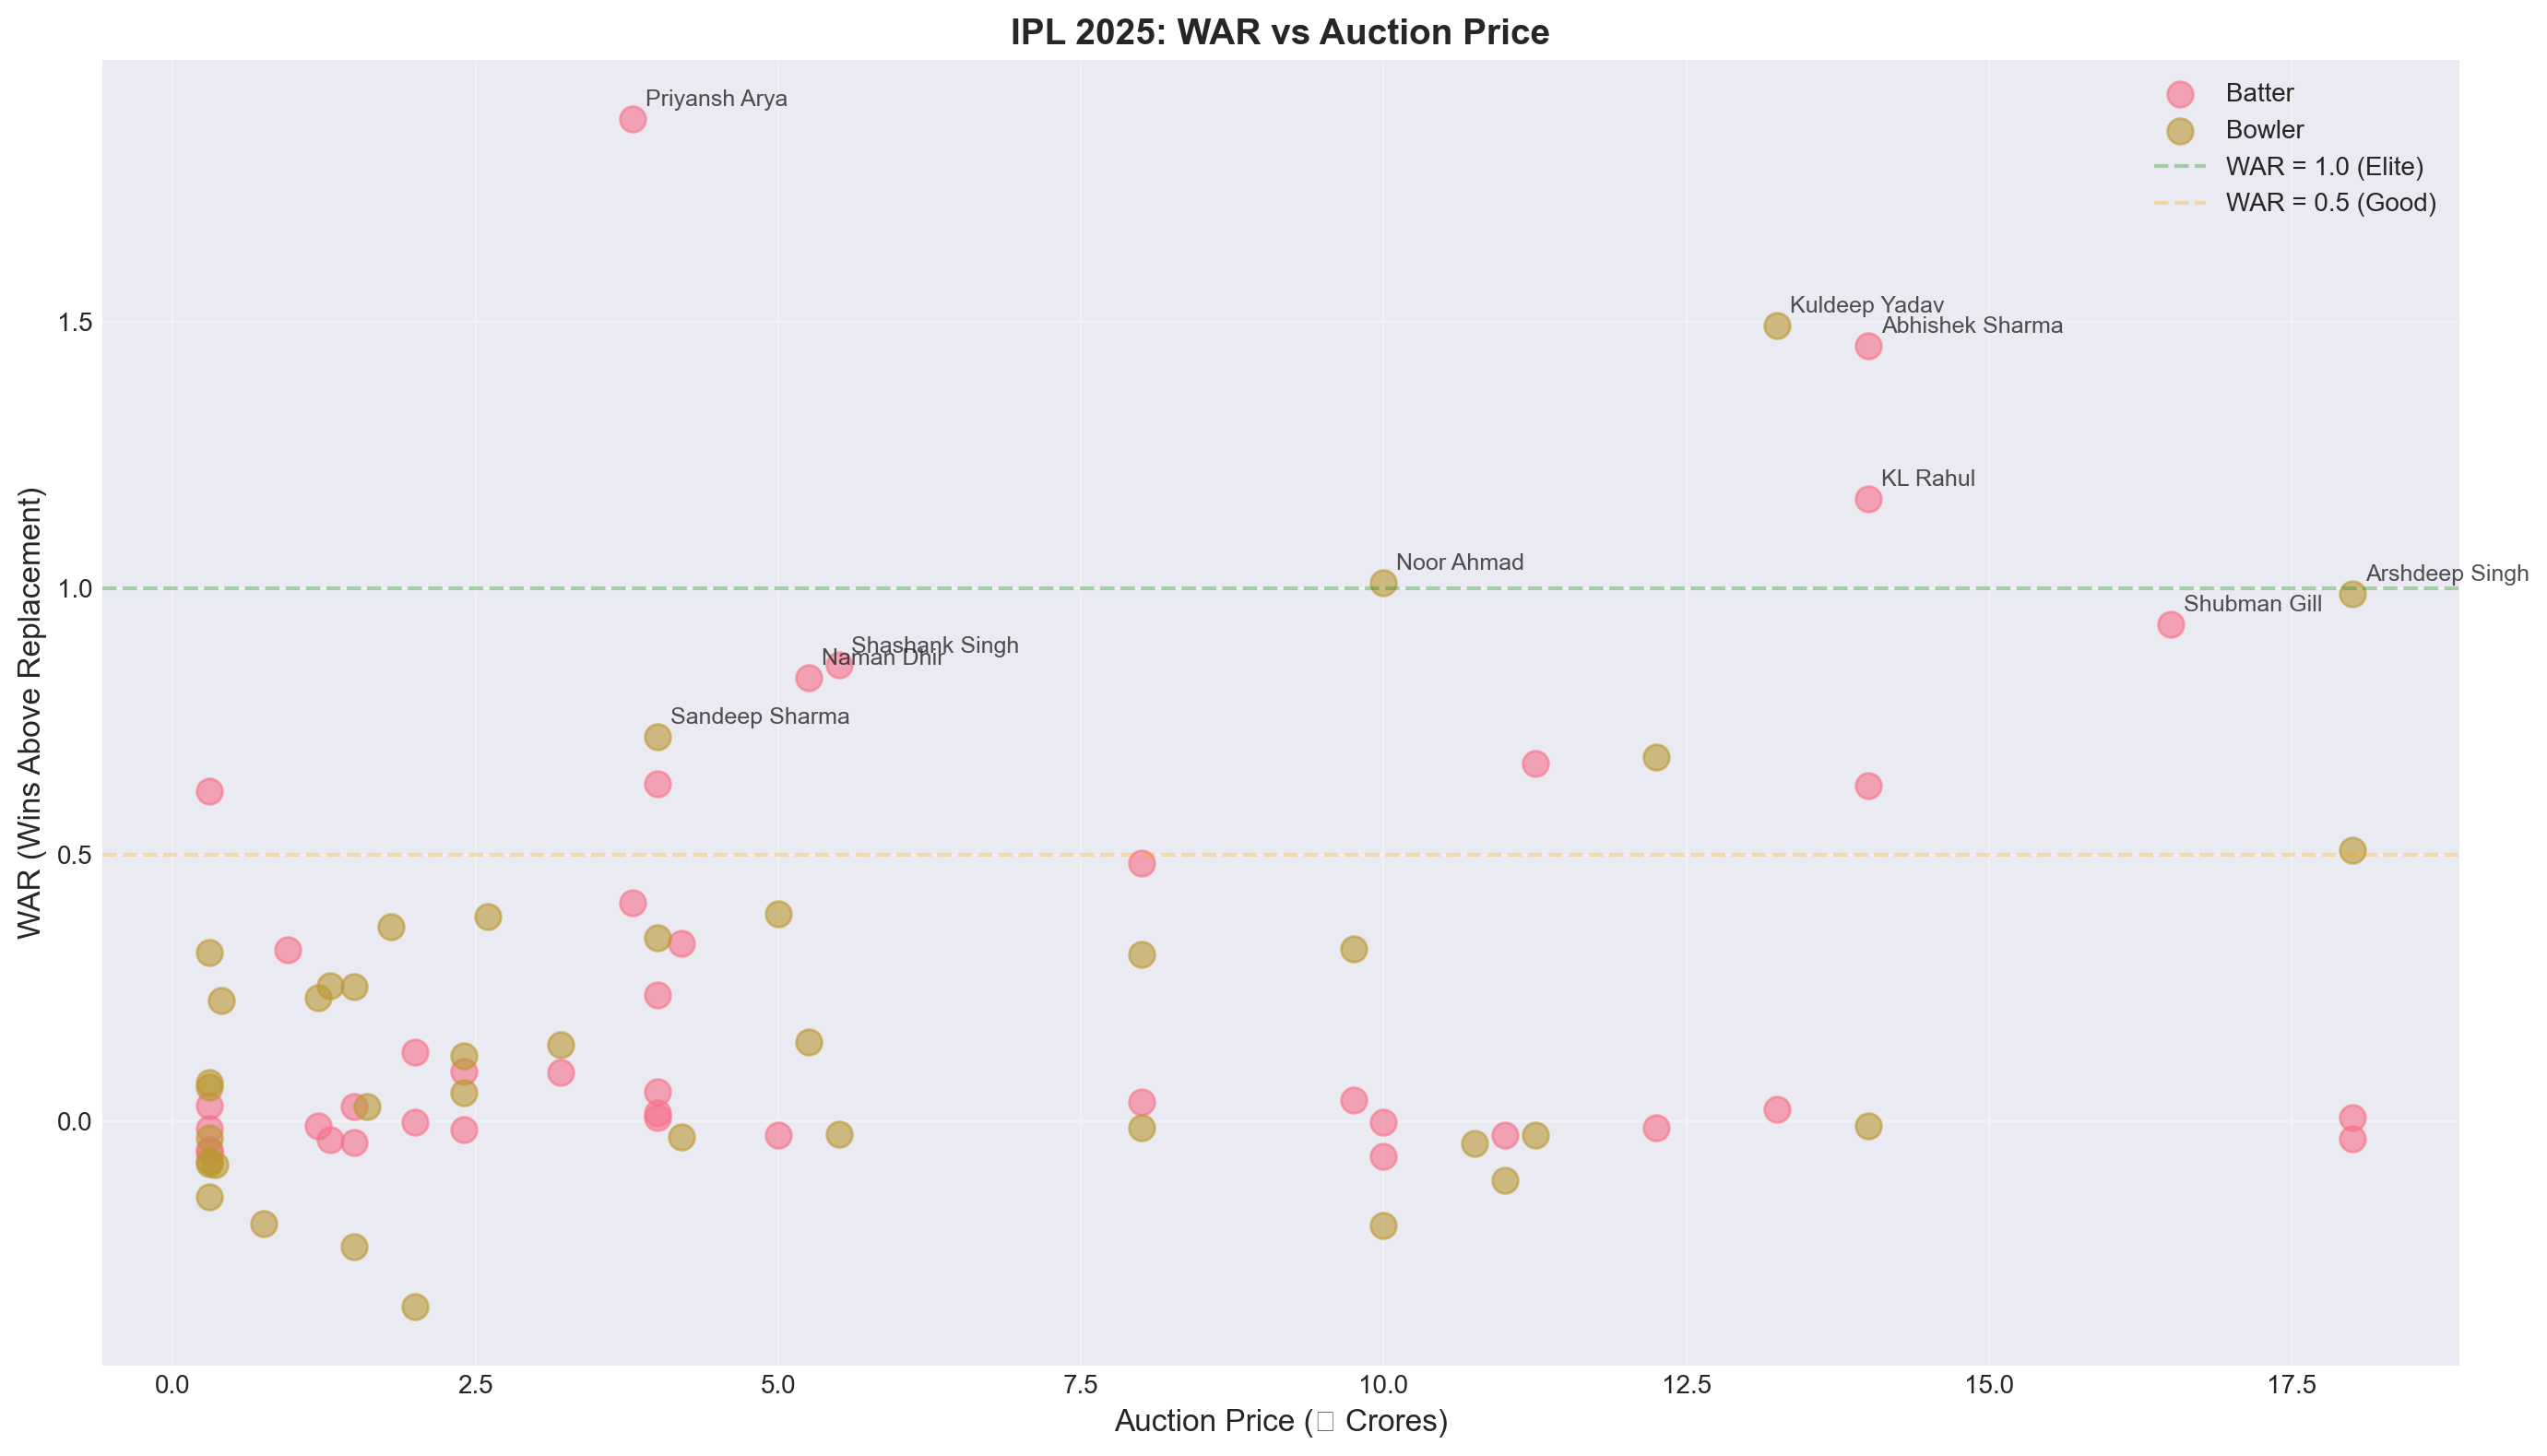

In [16]:
# Scatter plot: WAR vs Auction Price
fig, ax = plt.subplots(figsize=(14, 8))

# Color by role
for role in ['Batter', 'Bowler']:
    role_data = players_with_prices[players_with_prices['role'] == role]
    ax.scatter(role_data['auction_price_cr'], role_data['WAR'], 
               alpha=0.6, s=100, label=role)

# Add labels for top performers
top_performers = players_with_prices.nlargest(10, 'WAR')
for _, player in top_performers.iterrows():
    ax.annotate(player['player_name'], 
                xy=(player['auction_price_cr'], player['WAR']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

# Add reference lines
ax.axhline(y=1.0, color='green', linestyle='--', alpha=0.3, label='WAR = 1.0 (Elite)')
ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.3, label='WAR = 0.5 (Good)')

ax.set_xlabel('Auction Price (₹ Crores)', fontsize=12)
ax.set_ylabel('WAR (Wins Above Replacement)', fontsize=12)
ax.set_title('IPL 2025: WAR vs Auction Price', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

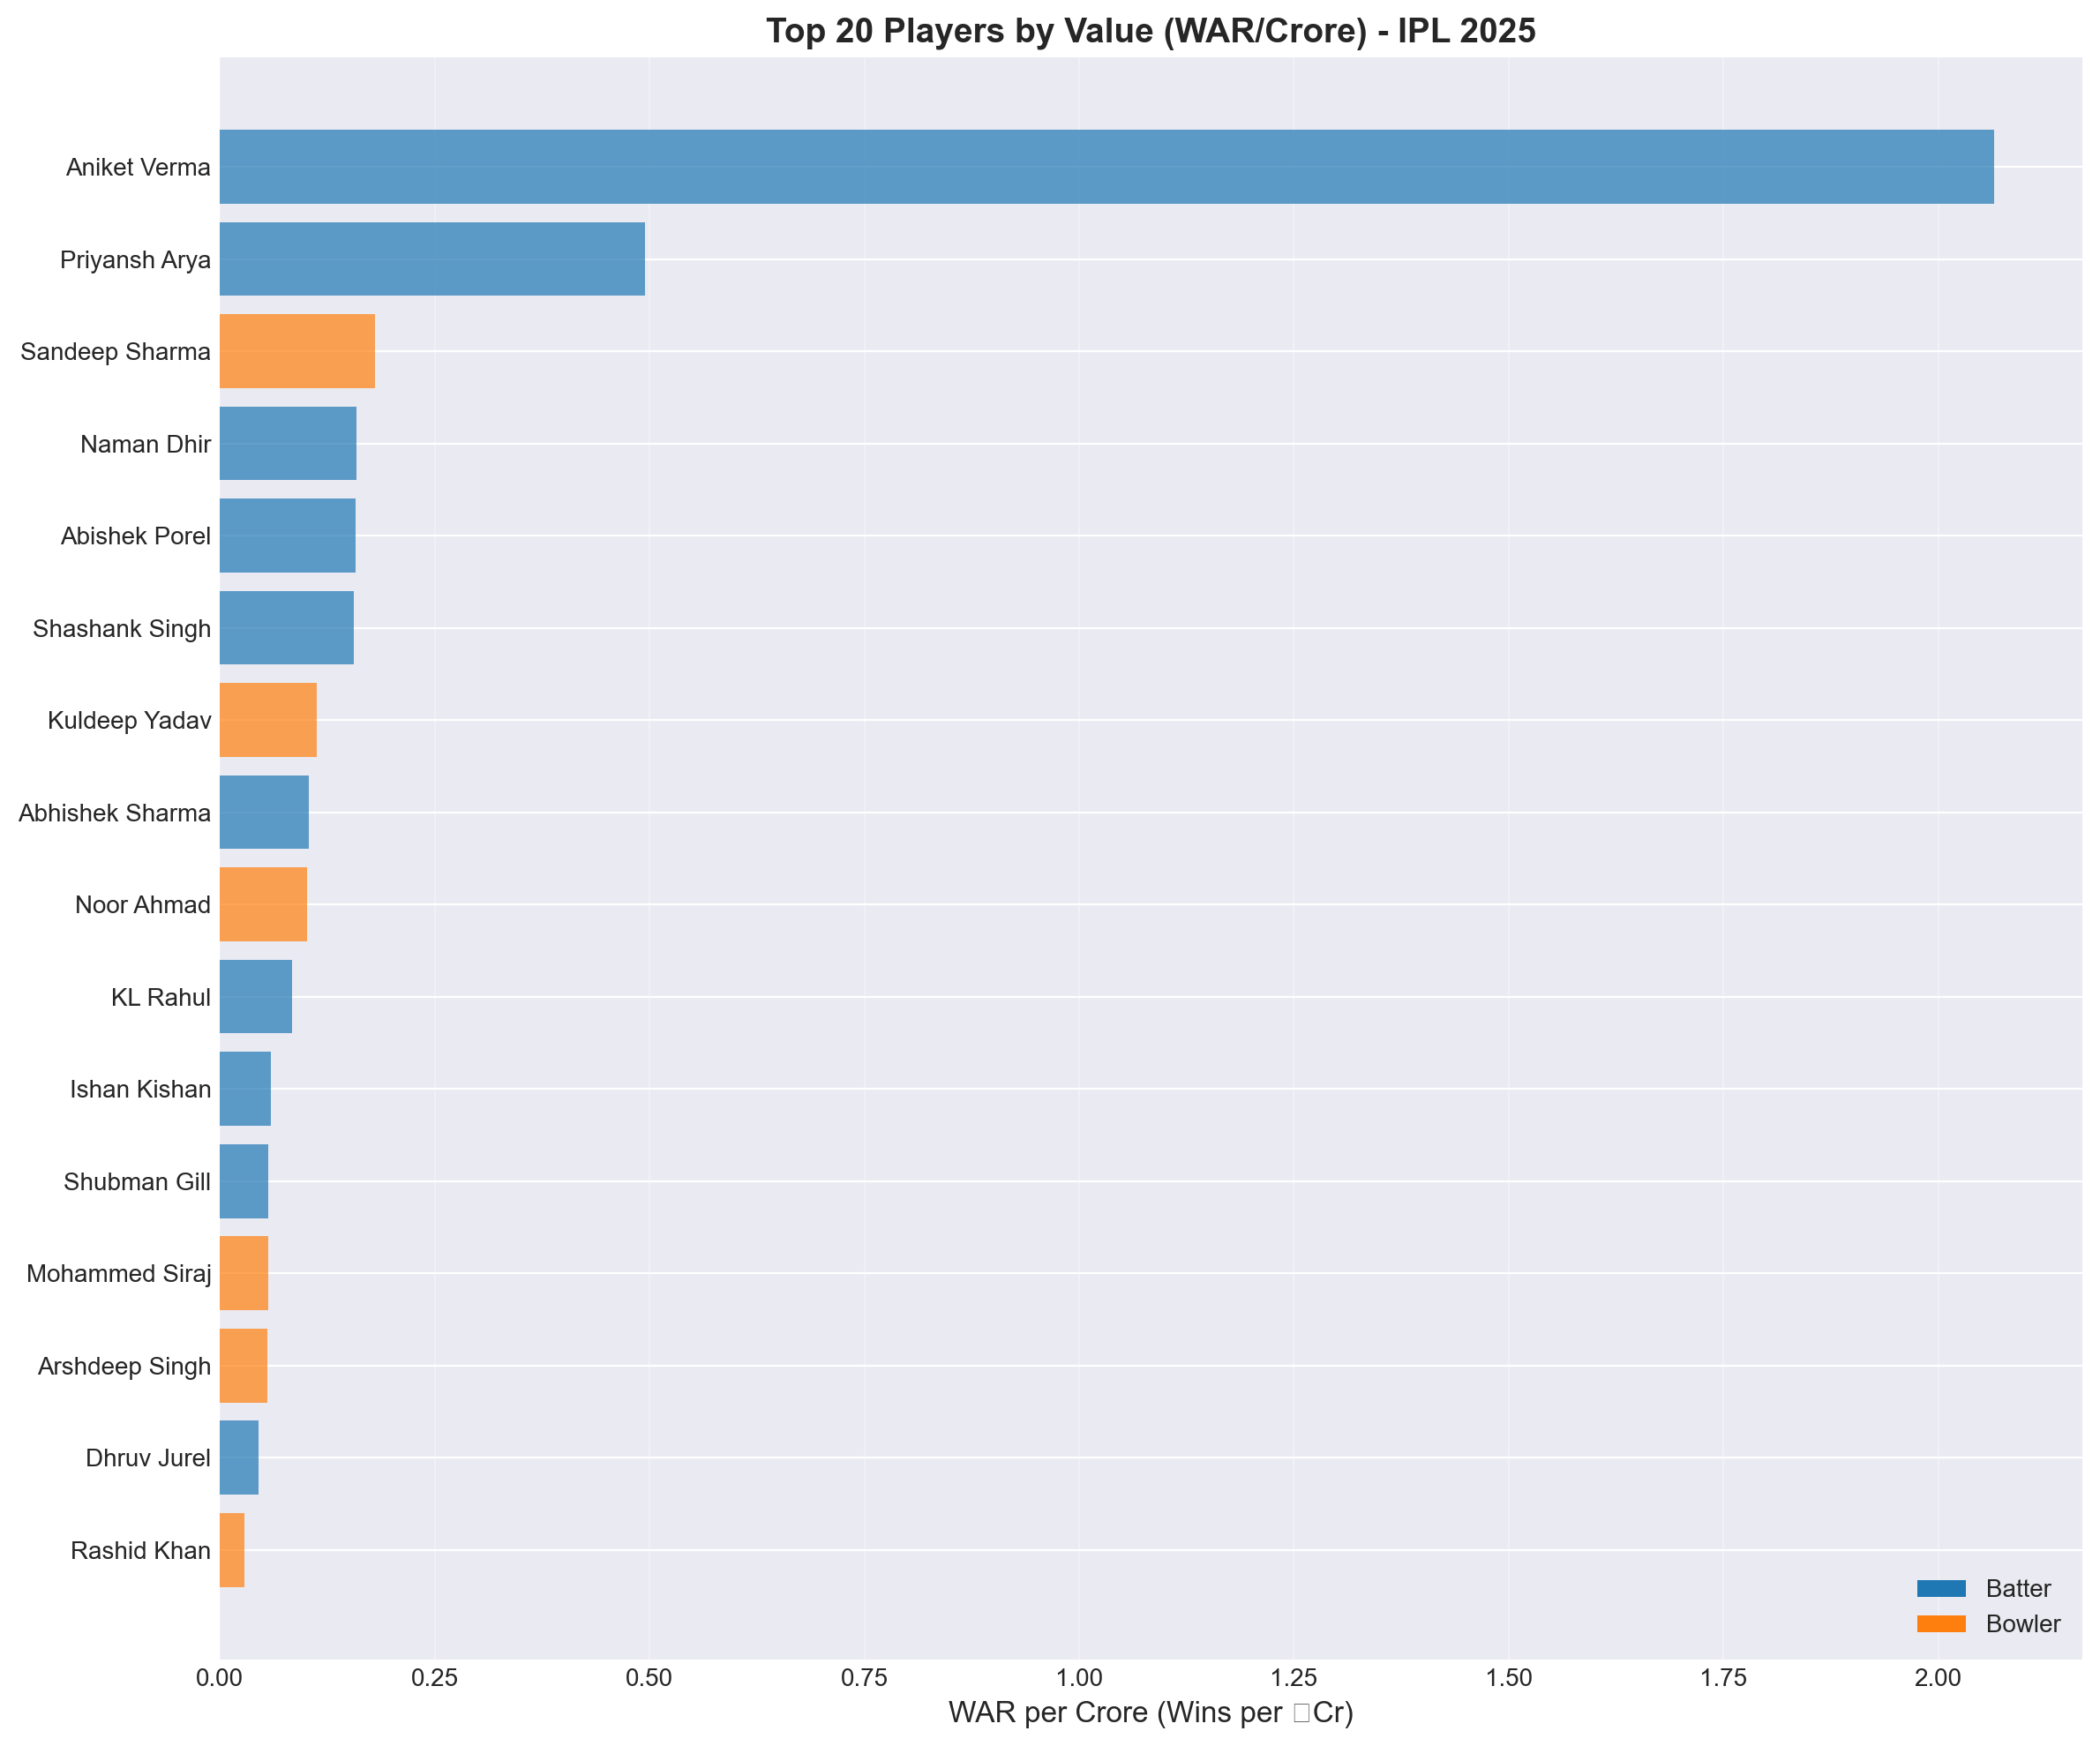

In [17]:
# Bar chart: Top 20 by WAR/Crore
fig, ax = plt.subplots(figsize=(12, 10))

top_20_value = qualified.nlargest(20, 'war_per_crore')
colors = ['#1f77b4' if role == 'Batter' else '#ff7f0e' for role in top_20_value['role']]

ax.barh(range(len(top_20_value)), top_20_value['war_per_crore'], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_20_value)))
ax.set_yticklabels(top_20_value['player_name'])
ax.set_xlabel('WAR per Crore (Wins per ₹Cr)', fontsize=12)
ax.set_title('Top 20 Players by Value (WAR/Crore) - IPL 2025', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', label='Batter'),
                   Patch(facecolor='#ff7f0e', label='Bowler')]
ax.legend(handles=legend_elements, loc='lower right')

ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

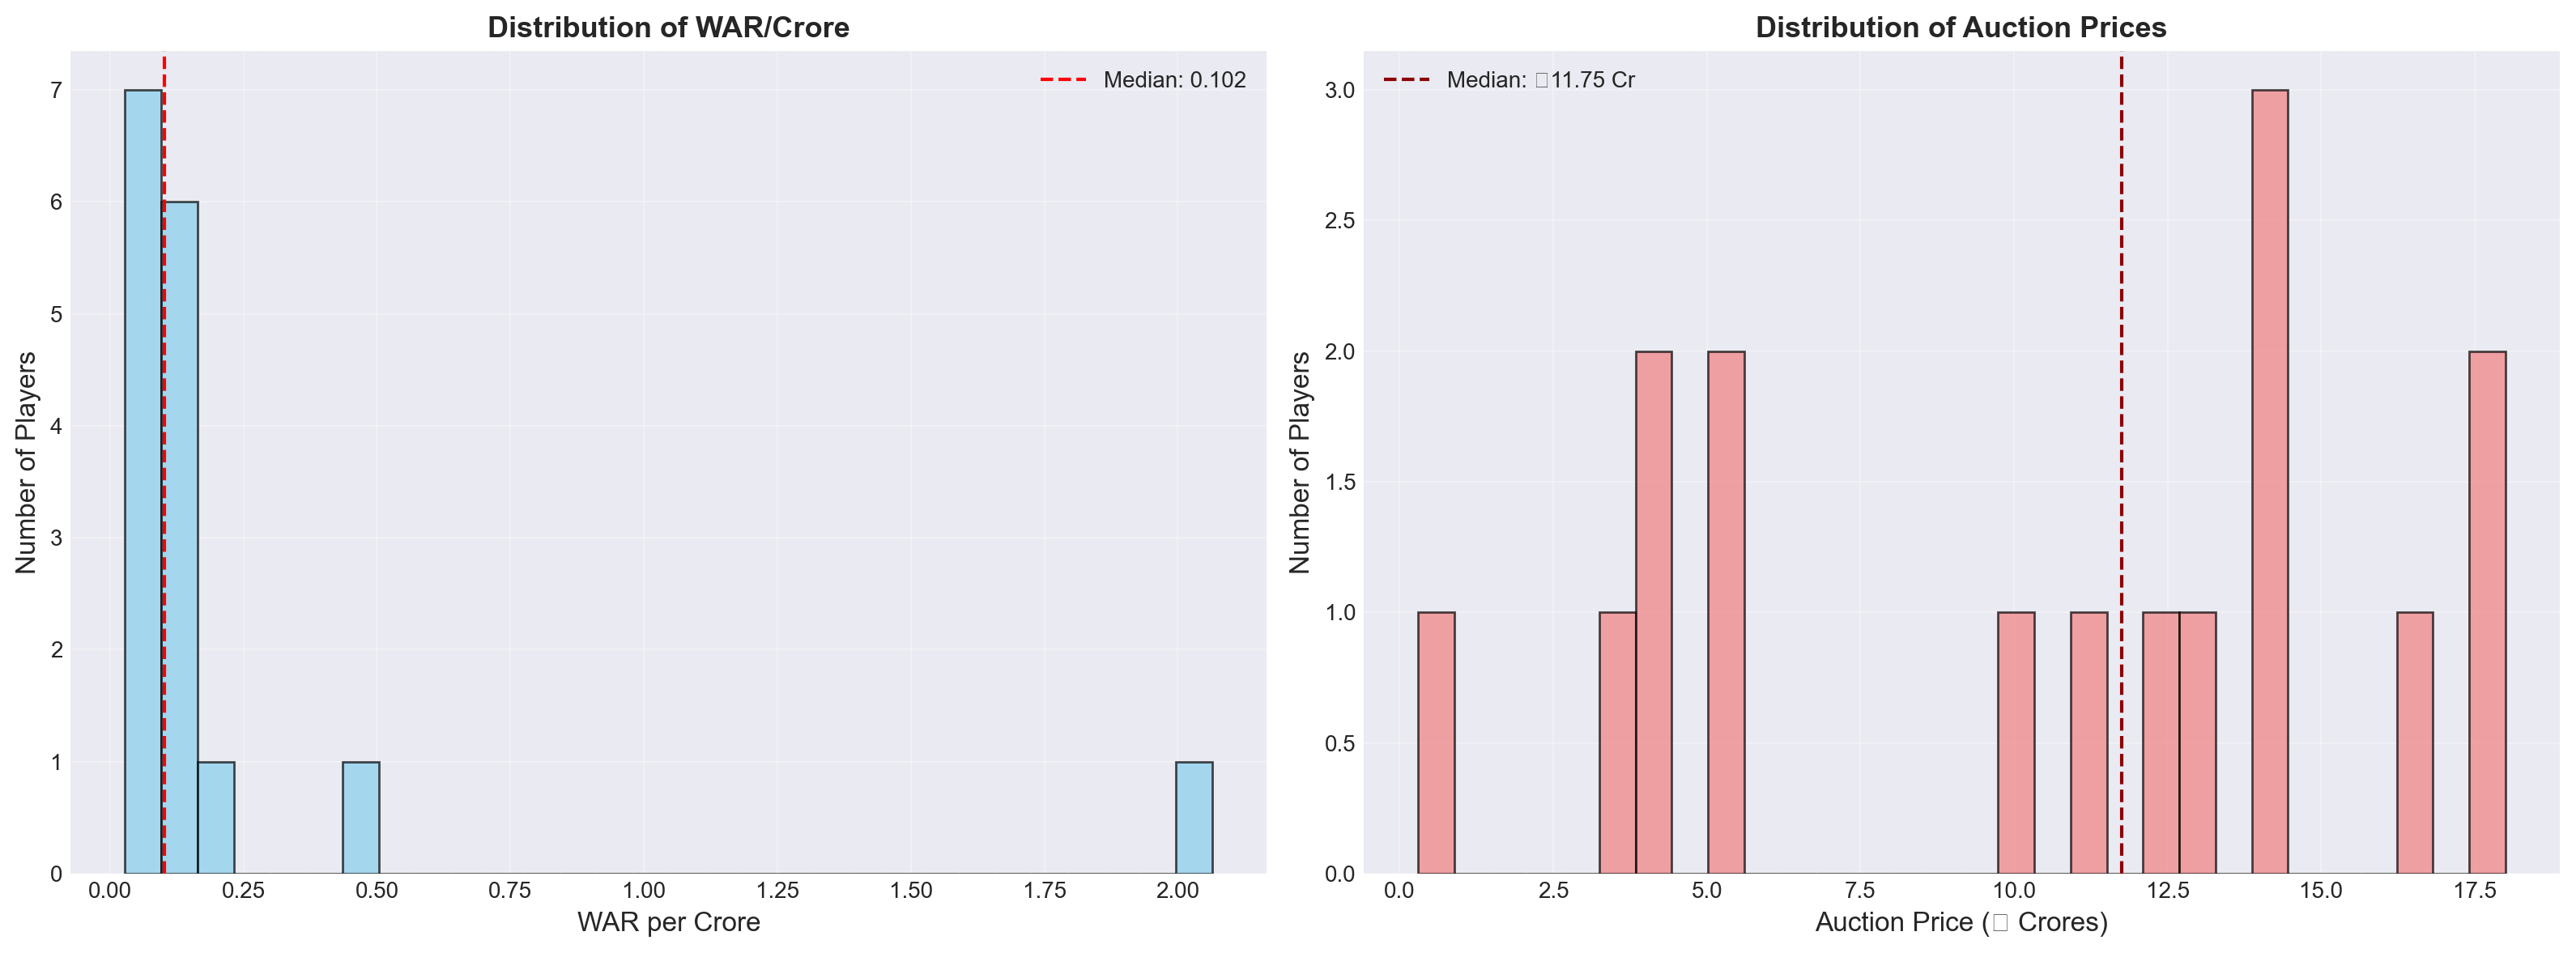

In [18]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# WAR/Crore distribution
axes[0].hist(qualified['war_per_crore'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(qualified['war_per_crore'].median(), color='red', linestyle='--', 
                label=f'Median: {qualified["war_per_crore"].median():.3f}')
axes[0].set_xlabel('WAR per Crore', fontsize=12)
axes[0].set_ylabel('Number of Players', fontsize=12)
axes[0].set_title('Distribution of WAR/Crore', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Auction price distribution
axes[1].hist(qualified['auction_price_cr'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].axvline(qualified['auction_price_cr'].median(), color='darkred', linestyle='--',
                label=f'Median: ₹{qualified["auction_price_cr"].median():.2f} Cr')
axes[1].set_xlabel('Auction Price (₹ Crores)', fontsize=12)
axes[1].set_ylabel('Number of Players', fontsize=12)
axes[1].set_title('Distribution of Auction Prices', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

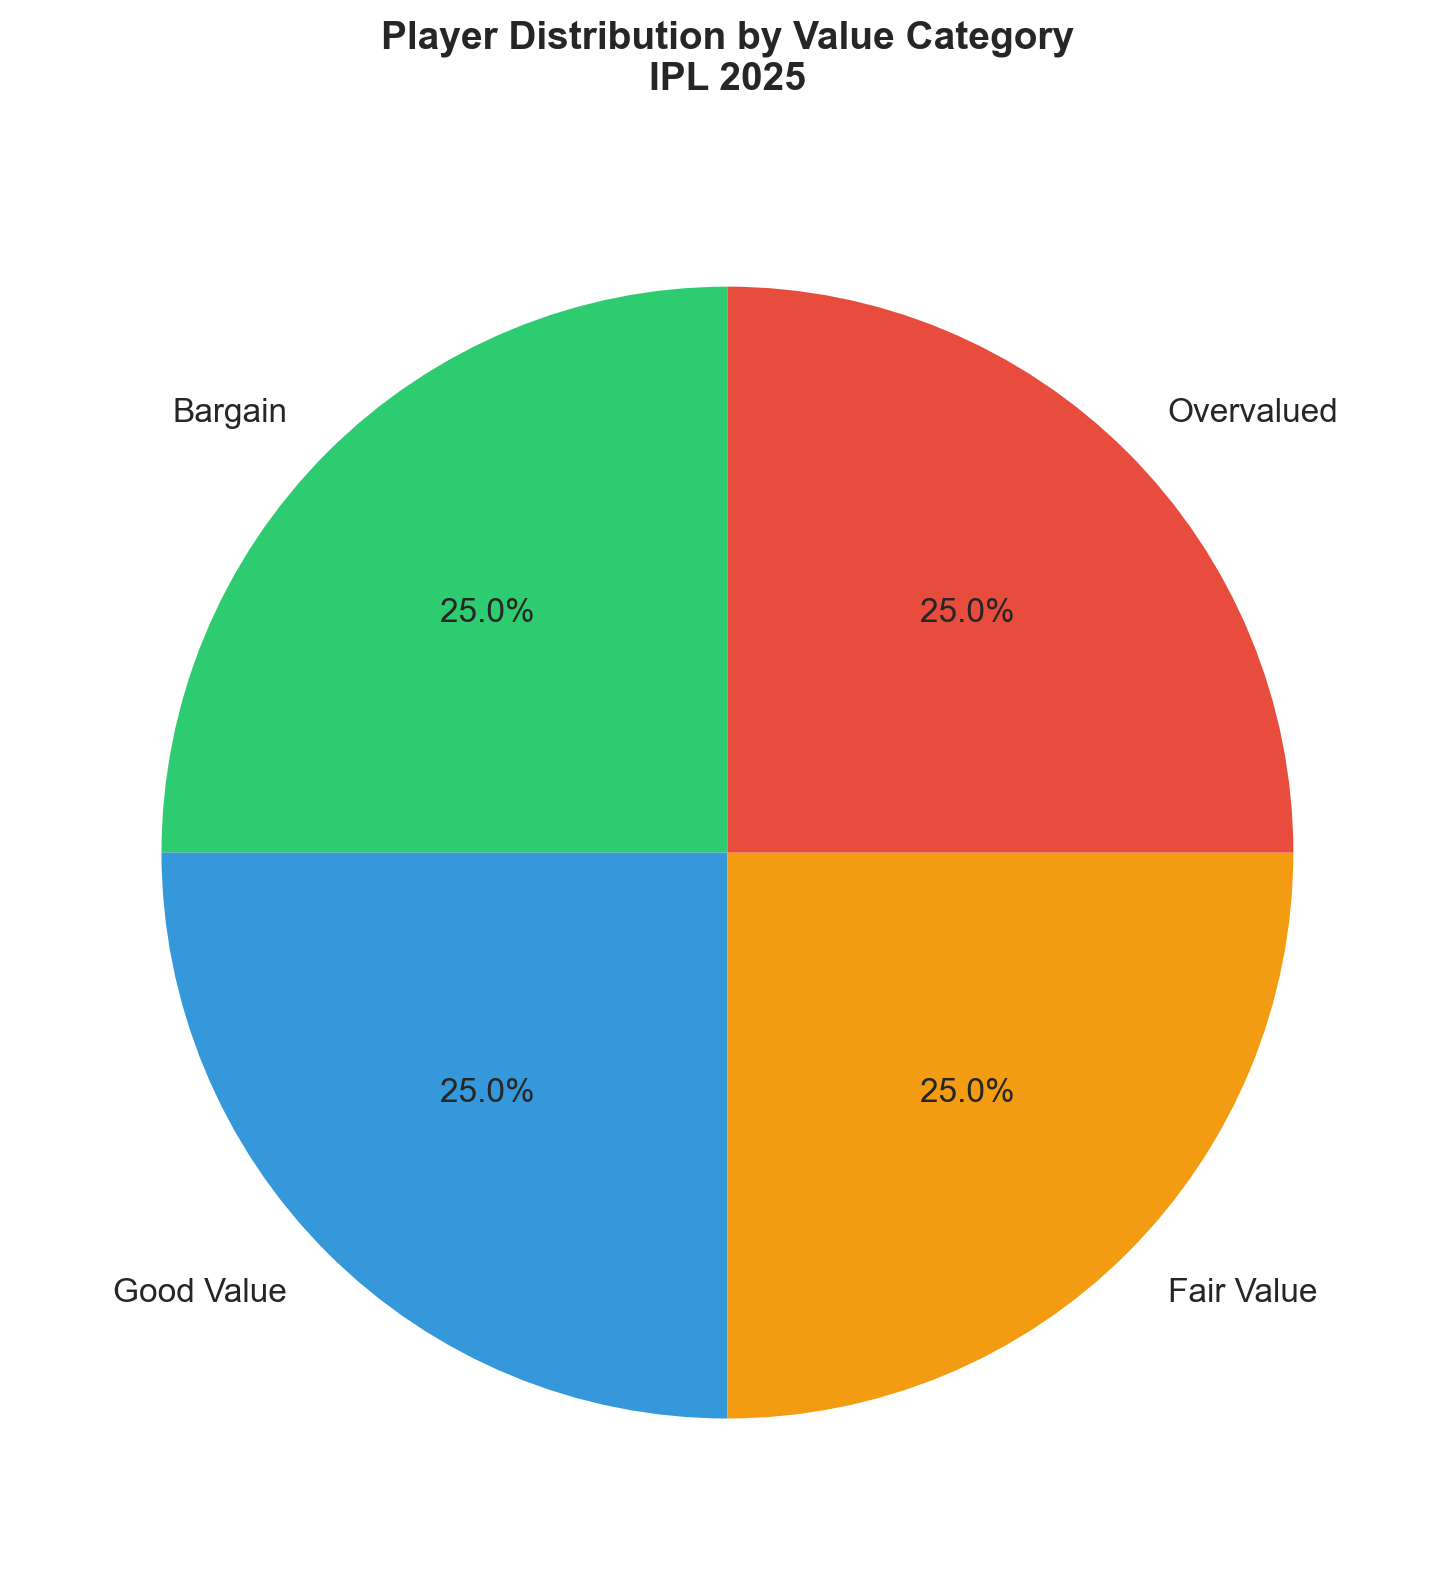

In [19]:
# Value category pie chart
fig, ax = plt.subplots(figsize=(10, 8))

category_counts = qualified['value_category'].value_counts()
colors_cat = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']

wedges, texts, autotexts = ax.pie(category_counts.values, 
                                    labels=category_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors_cat,
                                    startangle=90,
                                    textprops={'fontsize': 12})

ax.set_title('Player Distribution by Value Category\nIPL 2025', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

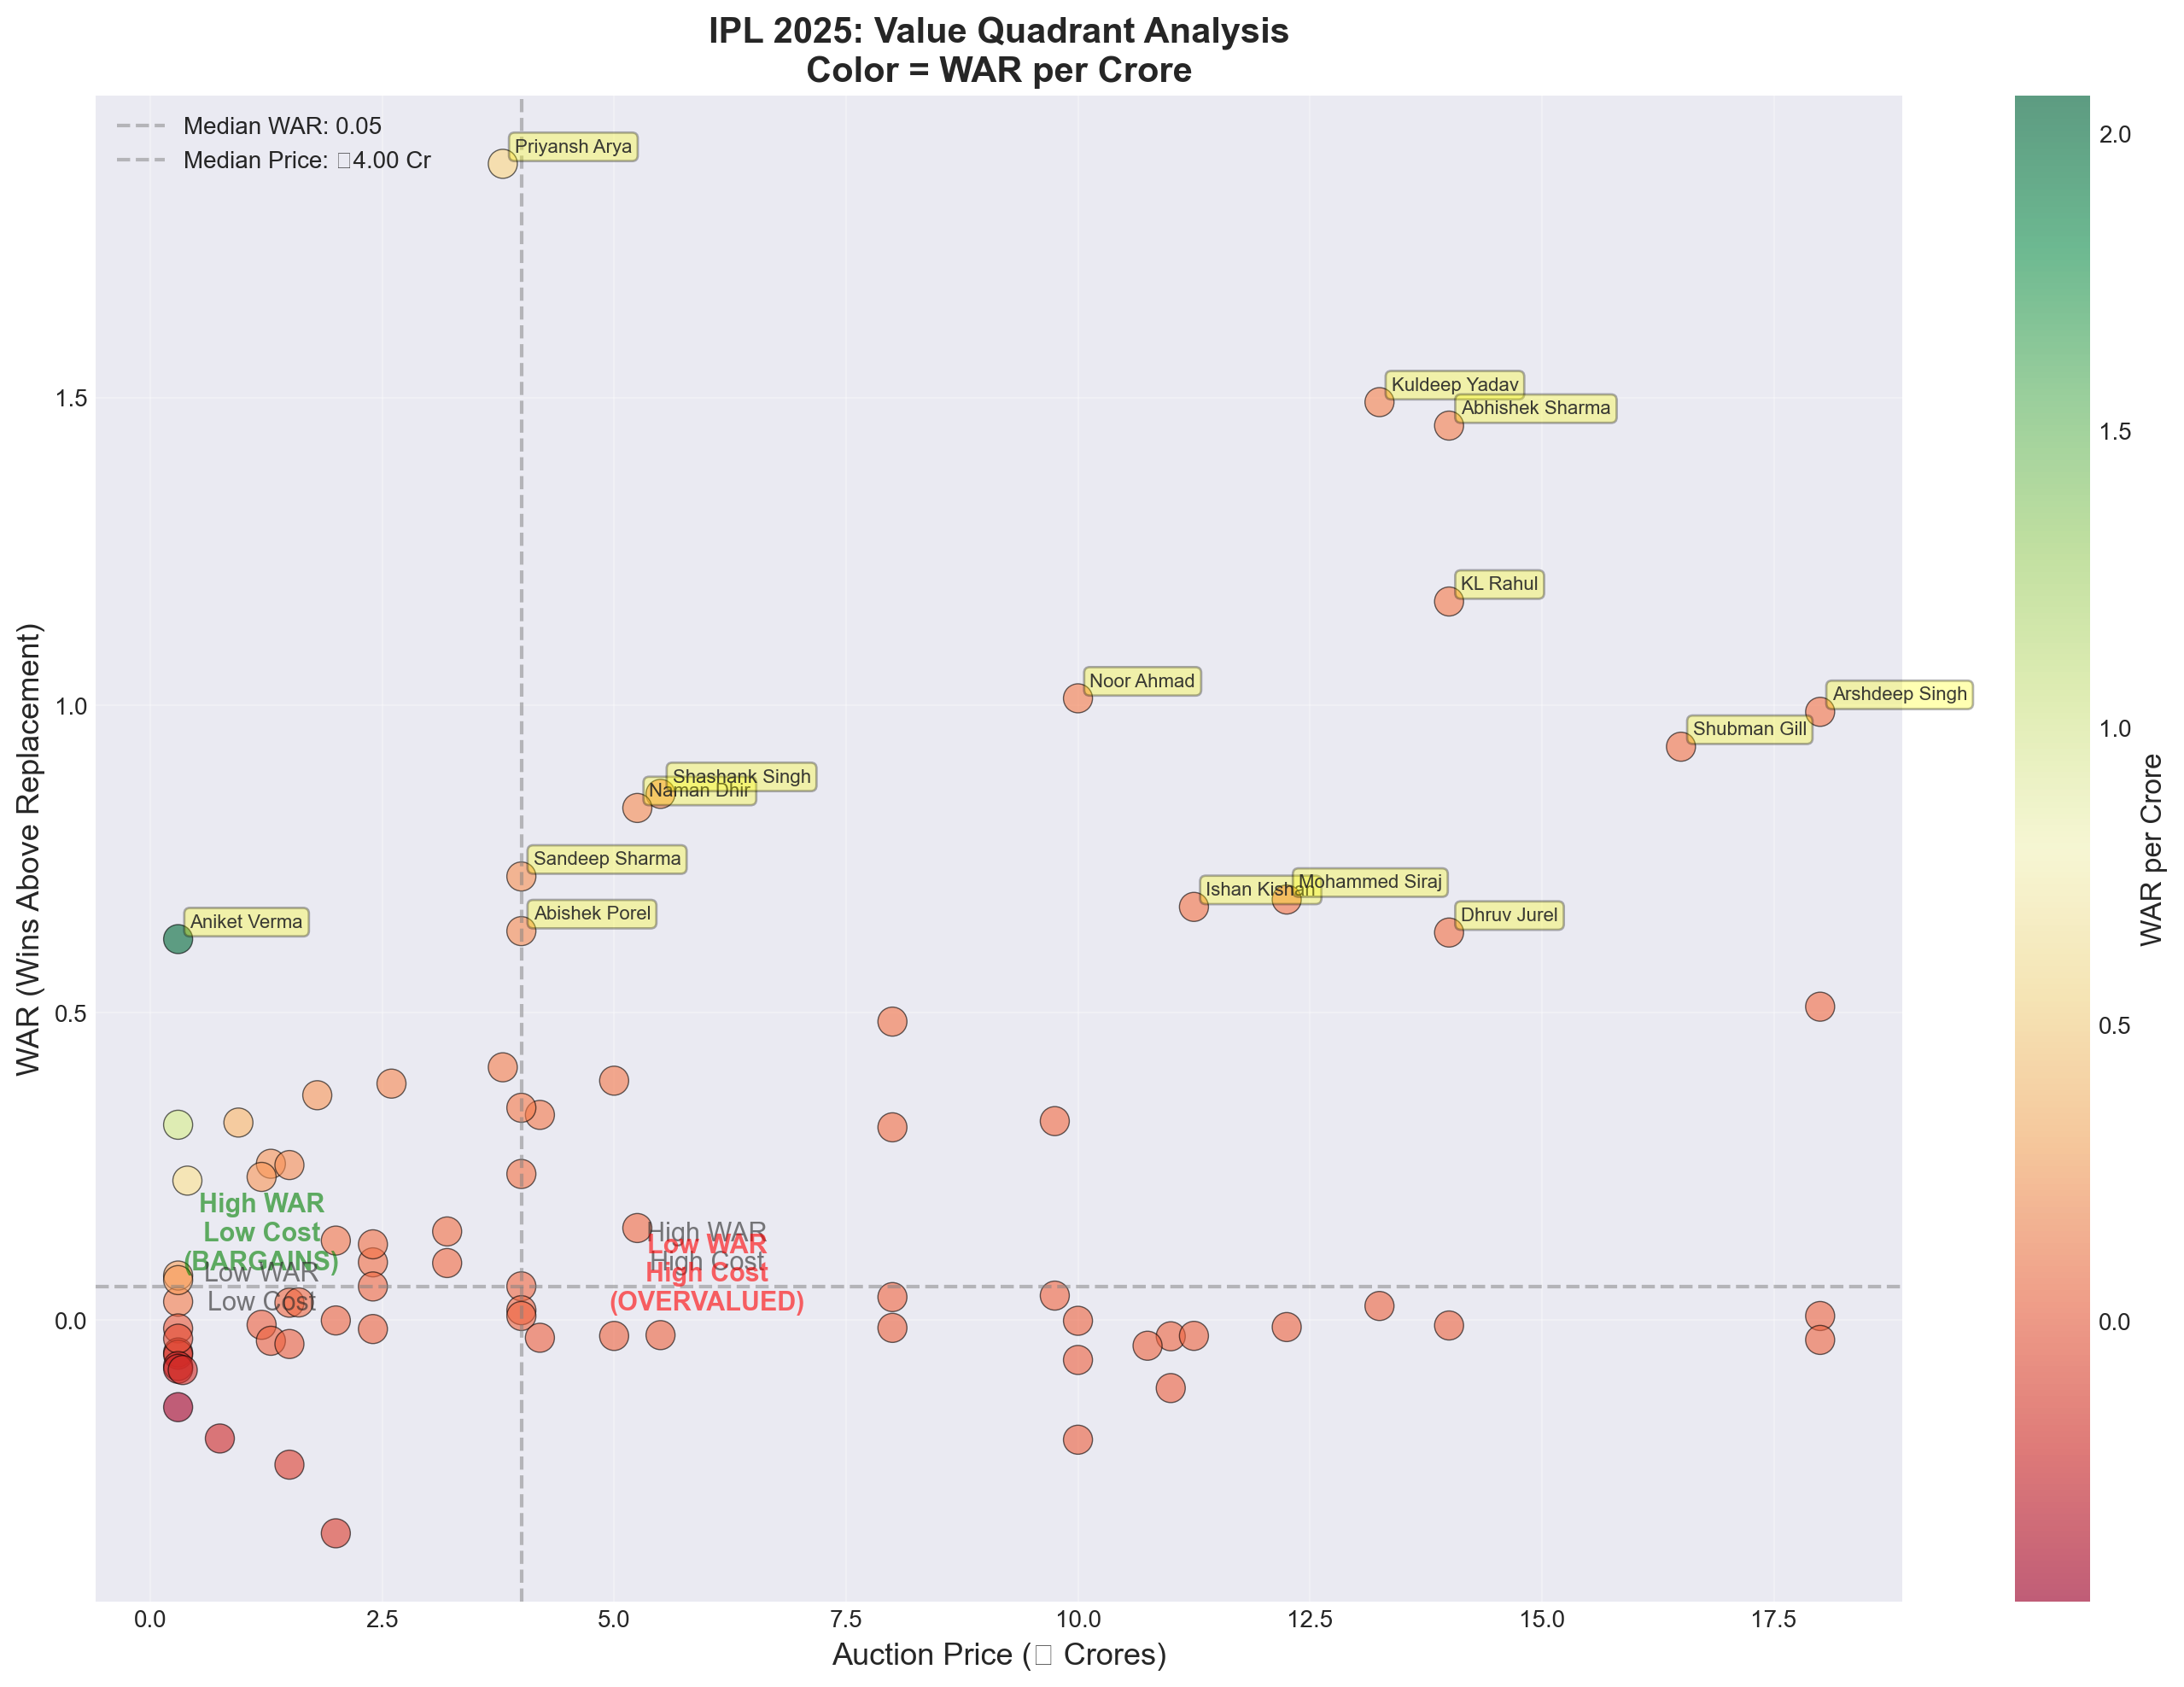

In [20]:
# Quadrant analysis: WAR vs Price with value lines
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all players
scatter = ax.scatter(players_with_prices['auction_price_cr'], 
                     players_with_prices['WAR'],
                     c=players_with_prices['war_per_crore'],
                     s=150,
                     alpha=0.6,
                     cmap='RdYlGn',
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('WAR per Crore', fontsize=12)

# Add reference lines
median_price = players_with_prices['auction_price_cr'].median()
median_war = players_with_prices['WAR'].median()

ax.axhline(y=median_war, color='gray', linestyle='--', alpha=0.5, label=f'Median WAR: {median_war:.2f}')
ax.axvline(x=median_price, color='gray', linestyle='--', alpha=0.5, label=f'Median Price: ₹{median_price:.2f} Cr')

# Label top value players
top_value_players = qualified.nlargest(15, 'war_per_crore')
for _, player in top_value_players.iterrows():
    ax.annotate(player['player_name'], 
                xy=(player['auction_price_cr'], player['WAR']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Add quadrant labels
ax.text(median_price * 1.5, median_war * 1.5, 'High WAR\nHigh Cost', 
        fontsize=11, alpha=0.6, ha='center')
ax.text(median_price * 0.3, median_war * 1.5, 'High WAR\nLow Cost\n(BARGAINS)', 
        fontsize=11, alpha=0.6, ha='center', color='green', fontweight='bold')
ax.text(median_price * 1.5, median_war * 0.3, 'Low WAR\nHigh Cost\n(OVERVALUED)', 
        fontsize=11, alpha=0.6, ha='center', color='red', fontweight='bold')
ax.text(median_price * 0.3, median_war * 0.3, 'Low WAR\nLow Cost', 
        fontsize=11, alpha=0.6, ha='center')

ax.set_xlabel('Auction Price (₹ Crores)', fontsize=13)
ax.set_ylabel('WAR (Wins Above Replacement)', fontsize=13)
ax.set_title('IPL 2025: Value Quadrant Analysis\nColor = WAR per Crore', 
             fontsize=15, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Price Bucket Analysis

In [21]:
# Analyze value by price buckets
def categorize_price(price):
    if price < 2:
        return 'Budget (<2 Cr)'
    elif price < 5:
        return 'Mid-tier (2-5 Cr)'
    elif price < 10:
        return 'Premium (5-10 Cr)'
    else:
        return 'Marquee (>10 Cr)'

players_with_prices['price_bucket'] = players_with_prices['auction_price_cr'].apply(categorize_price)

print("Average WAR by Price Bucket:")
print("="*80)
bucket_analysis = players_with_prices.groupby('price_bucket').agg({
    'WAR': ['mean', 'median', 'sum'],
    'war_per_crore': ['mean', 'median'],
    'player_name': 'count'
}).round(3)
bucket_analysis.columns = ['WAR_mean', 'WAR_median', 'WAR_total', 
                            'WAR_per_Cr_mean', 'WAR_per_Cr_median', 'num_players']
display(bucket_analysis)

Average WAR by Price Bucket:


,WAR_mean,WAR_median,WAR_total,WAR_per_Cr_mean,WAR_per_Cr_median,num_players
price_bucket,,,,,,
Budget (<2 Cr),0.068,0.010,1.776,0.123,0.006,26
Marquee (>10 Cr),0.412,0.015,9.056,0.030,0.001,22
Mid-tier (2-5 Cr),0.251,0.123,5.271,0.067,0.045,21
Premium (5-10 Cr),0.280,0.232,3.364,0.046,0.031,12


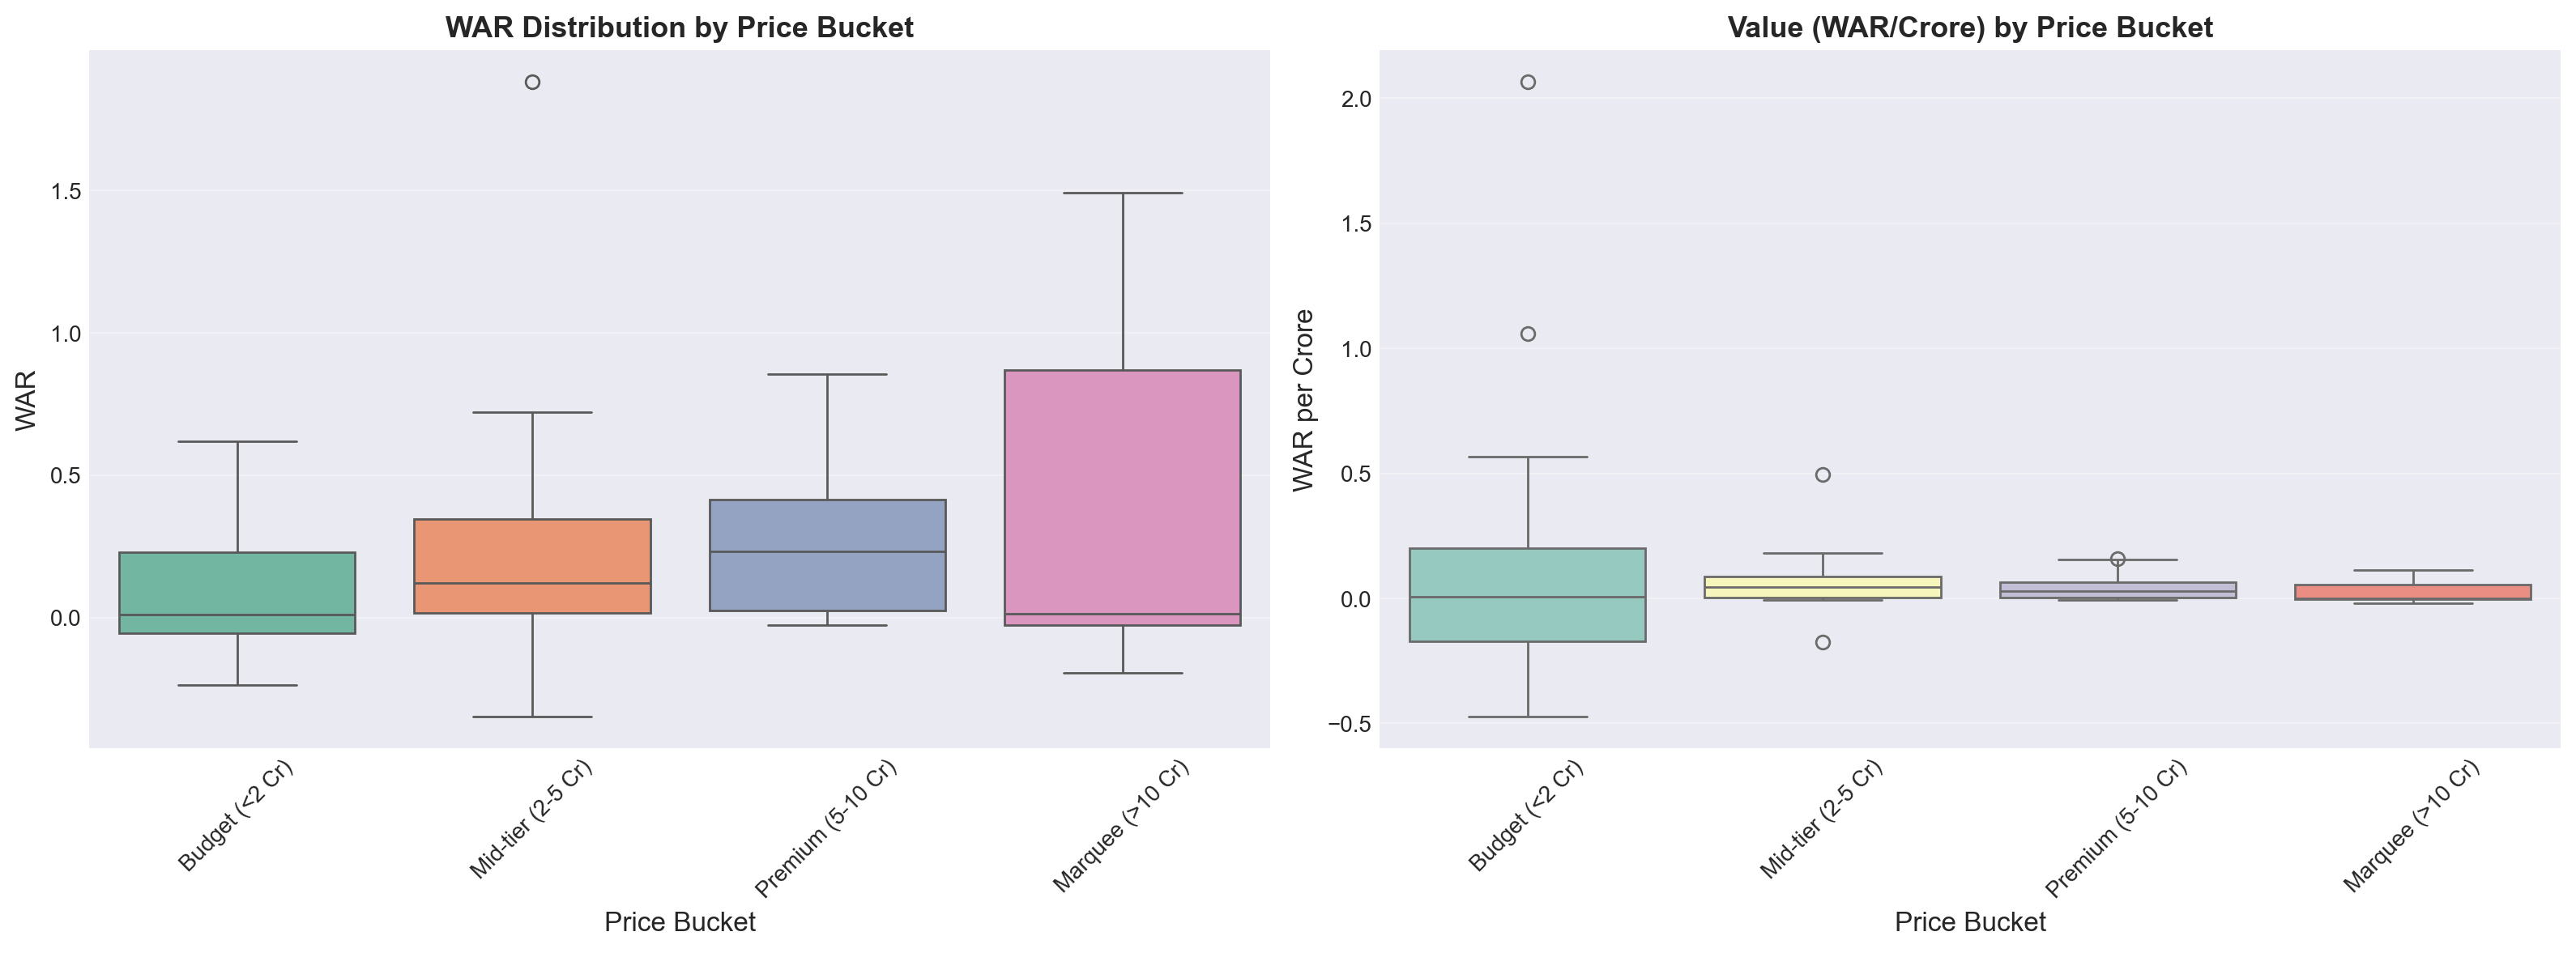

In [22]:
# Box plot: WAR by price bucket
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# WAR by price bucket
bucket_order = ['Budget (<2 Cr)', 'Mid-tier (2-5 Cr)', 'Premium (5-10 Cr)', 'Marquee (>10 Cr)']
sns.boxplot(data=players_with_prices, x='price_bucket', y='WAR', 
            order=bucket_order, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Price Bucket', fontsize=12)
axes[0].set_ylabel('WAR', fontsize=12)
axes[0].set_title('WAR Distribution by Price Bucket', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# WAR/Crore by price bucket
sns.boxplot(data=players_with_prices, x='price_bucket', y='war_per_crore', 
            order=bucket_order, ax=axes[1], palette='Set3')
axes[1].set_xlabel('Price Bucket', fontsize=12)
axes[1].set_ylabel('WAR per Crore', fontsize=12)
axes[1].set_title('Value (WAR/Crore) by Price Bucket', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Team-Level Analysis

In [23]:
# Aggregate by team
team_summary = players_with_prices.groupby('team').agg({
    'WAR': 'sum',
    'auction_price_cr': 'sum',
    'player_name': 'count'
}).round(2)

team_summary.columns = ['Total_WAR', 'Total_Spend_Cr', 'Num_Players']
team_summary['WAR_per_Crore'] = (team_summary['Total_WAR'] / team_summary['Total_Spend_Cr']).round(3)
team_summary['Avg_WAR_per_Player'] = (team_summary['Total_WAR'] / team_summary['Num_Players']).round(3)

team_summary = team_summary.sort_values('WAR_per_Crore', ascending=False)

print("TEAM-LEVEL VALUE ANALYSIS")
print("="*80)
display(team_summary)

TEAM-LEVEL VALUE ANALYSIS


,Total_WAR,Total_Spend_Cr,Num_Players,WAR_per_Crore,Avg_WAR_per_Player
team,,,,,
Mumbai Indians,1.53,18.80,4,0.081,0.382
Punjab Kings,4.34,63.20,15,0.069,0.289
Delhi Capitals,4.32,68.00,8,0.064,0.540
Royal Challengers Bengaluru,0.75,12.60,3,0.060,0.250
Chennai Super Kings,1.04,24.30,4,0.043,0.260
Rajasthan Royals,1.15,28.75,8,0.040,0.144
Kolkata Knight Riders,0.55,14.00,4,0.039,0.138
Sunrisers Hyderabad,2.47,74.80,12,0.033,0.206
Gujarat Titans,2.39,86.75,10,0.028,0.239


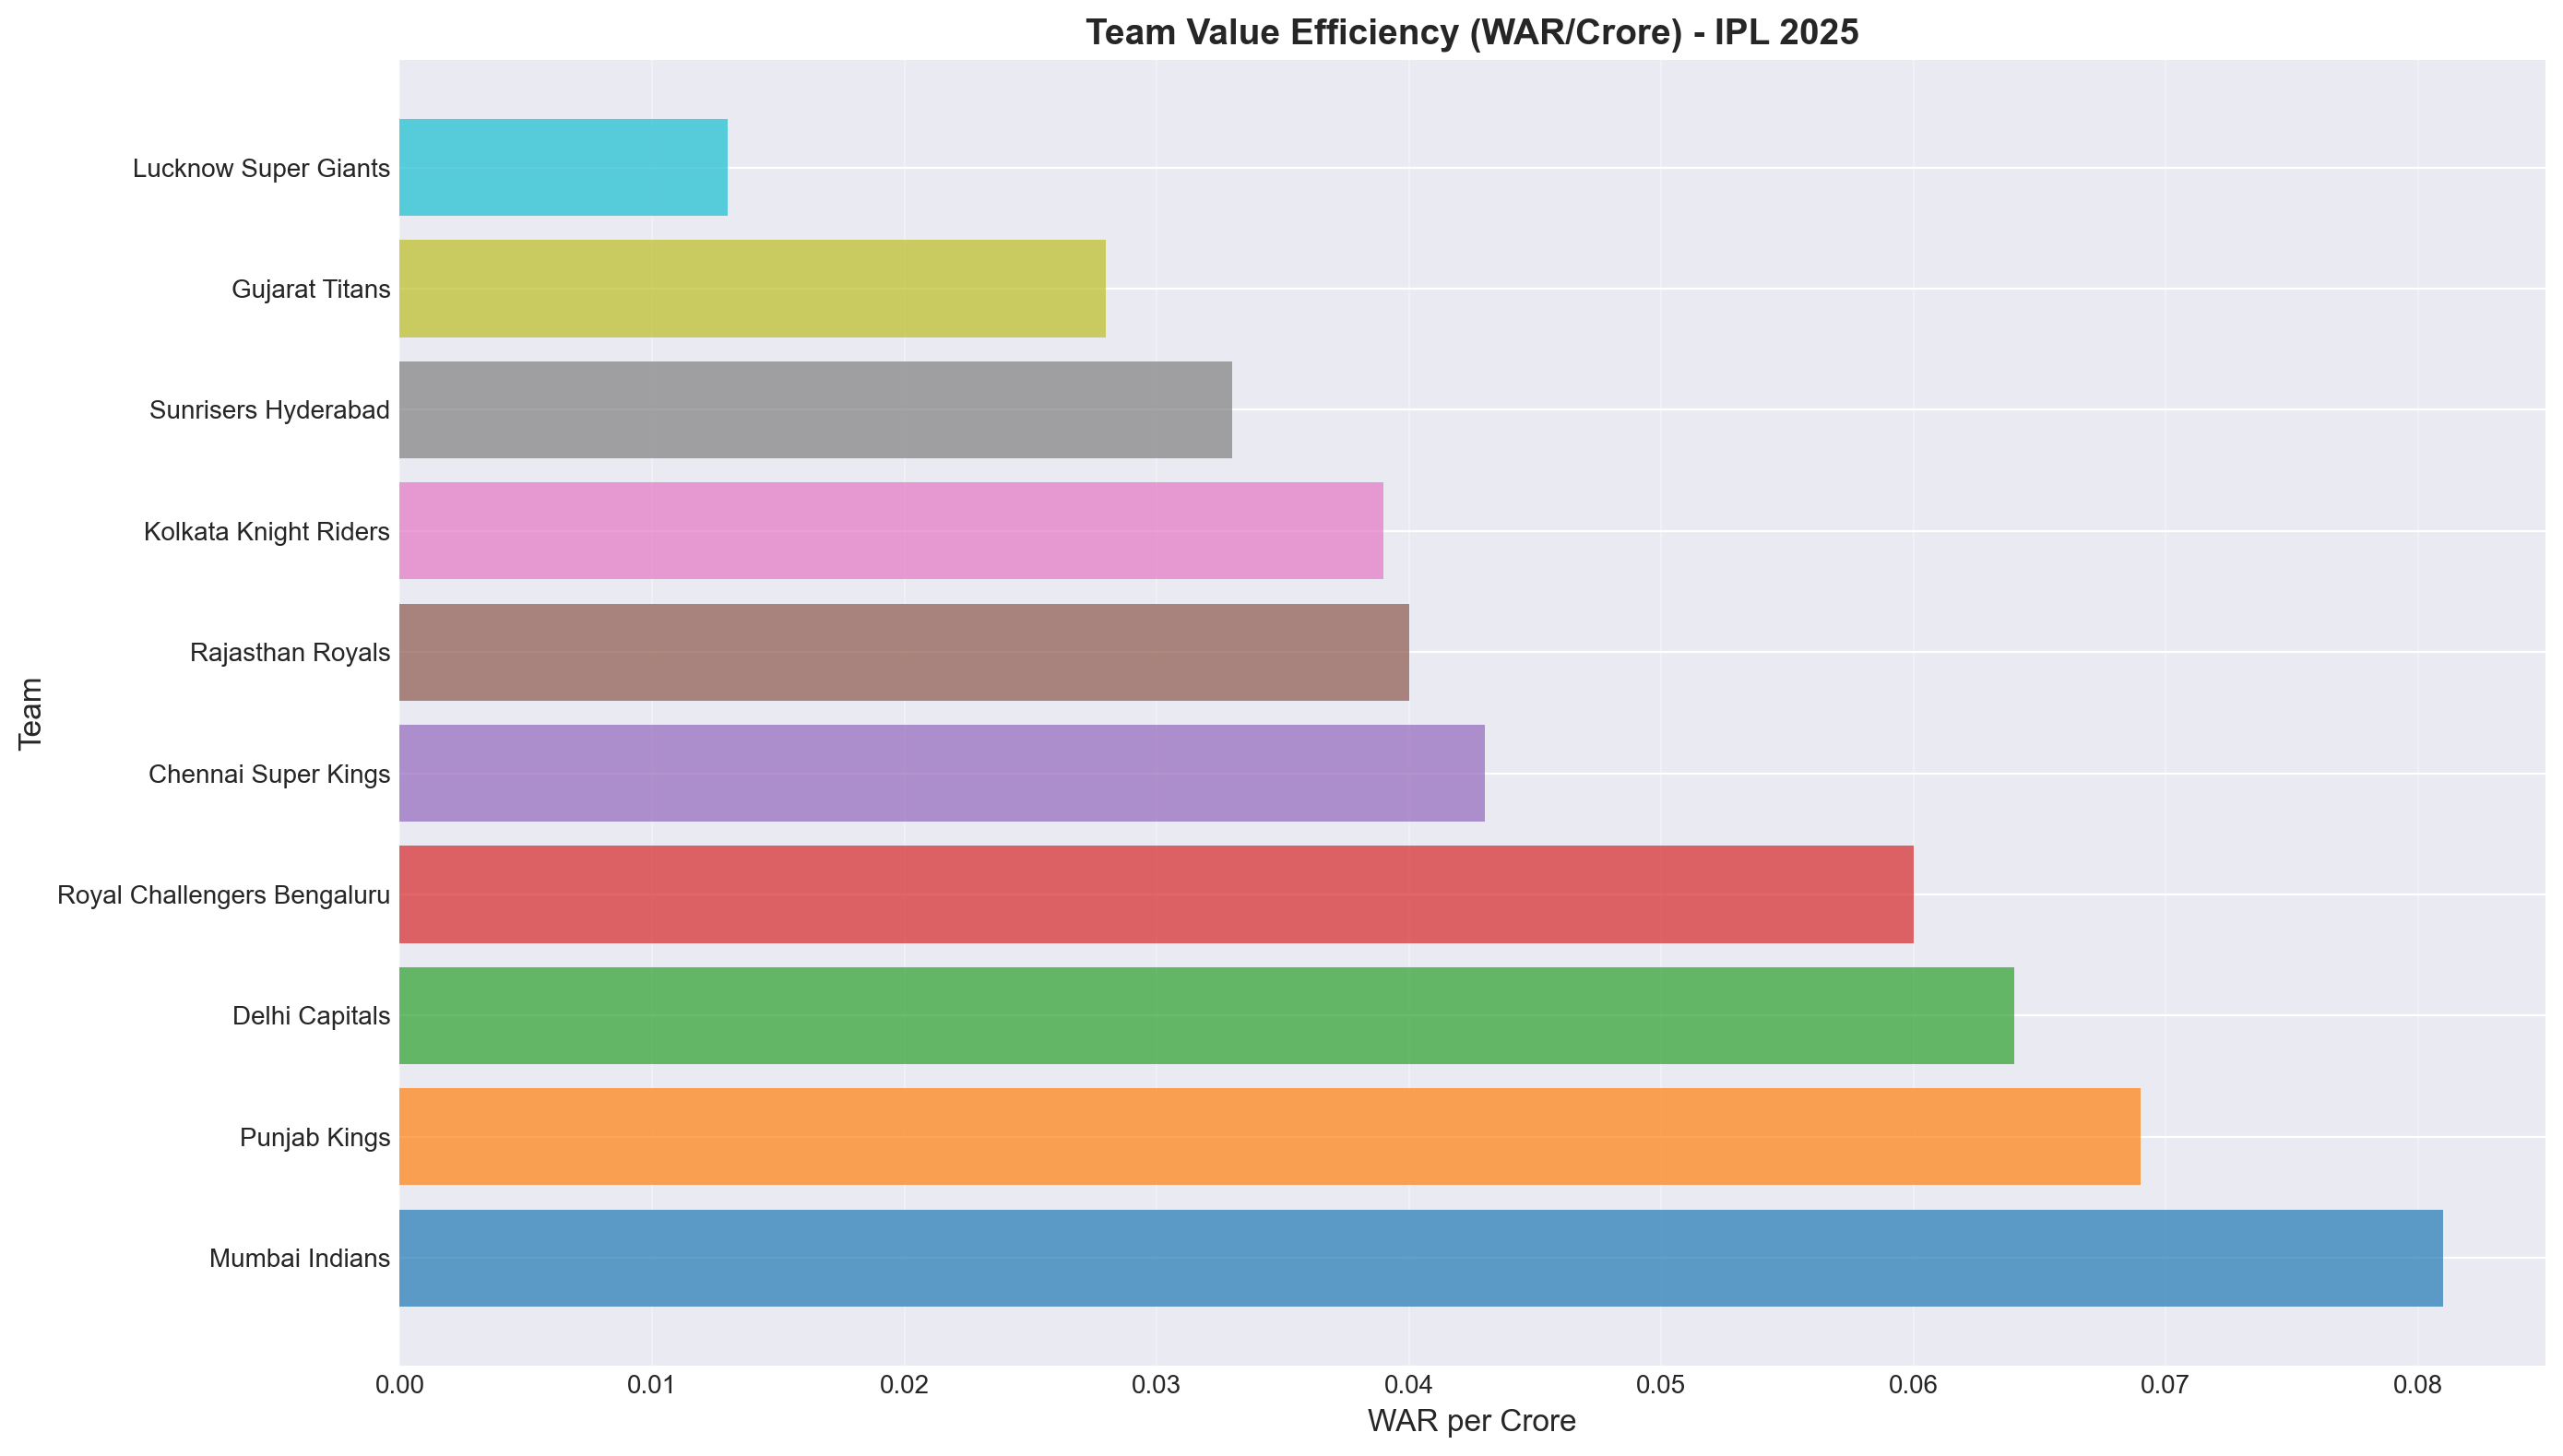

In [24]:
# Team WAR/Crore comparison
fig, ax = plt.subplots(figsize=(14, 8))

teams = team_summary.index
war_per_cr = team_summary['WAR_per_Crore']

colors_team = plt.cm.tab10(range(len(teams)))
ax.barh(teams, war_per_cr, color=colors_team, alpha=0.7)
ax.set_xlabel('WAR per Crore', fontsize=12)
ax.set_ylabel('Team', fontsize=12)
ax.set_title('Team Value Efficiency (WAR/Crore) - IPL 2025', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Key Insights & Findings

In [25]:
# Generate automated insights
print("KEY INSIGHTS - IPL 2025 VALUE ANALYSIS")
print("="*80)

# Best overall value
best_value = qualified.nlargest(1, 'war_per_crore').iloc[0]
print(f"\n1. BEST VALUE PLAYER:")
print(f"   {best_value['player_name']} ({best_value['role']}) - {best_value['team']}")
print(f"   - WAR: {best_value['WAR']:.2f}")
print(f"   - Price: ₹{best_value['auction_price_cr']:.2f} Cr")
print(f"   - WAR/Crore: {best_value['war_per_crore']:.3f}")

# Highest WAR
highest_war = players_with_prices.nlargest(1, 'WAR').iloc[0]
print(f"\n2. HIGHEST WAR PLAYER:")
print(f"   {highest_war['player_name']} ({highest_war['role']}) - {highest_war['team']}")
print(f"   - WAR: {highest_war['WAR']:.2f}")
print(f"   - Price: ₹{highest_war['auction_price_cr']:.2f} Cr")
print(f"   - WAR/Crore: {highest_war['war_per_crore']:.3f}")

# Most expensive
most_expensive = players_with_prices.nlargest(1, 'auction_price_cr').iloc[0]
print(f"\n3. MOST EXPENSIVE PLAYER:")
print(f"   {most_expensive['player_name']} ({most_expensive['role']}) - {most_expensive['team']}")
print(f"   - Price: ₹{most_expensive['auction_price_cr']:.2f} Cr")
print(f"   - WAR: {most_expensive['WAR']:.2f}")
print(f"   - WAR/Crore: {most_expensive['war_per_crore']:.3f}")

# Worst value (expensive + low WAR)
worst_value = expensive.nsmallest(1, 'war_per_crore').iloc[0]
print(f"\n4. WORST VALUE (among expensive players):")
print(f"   {worst_value['player_name']} ({worst_value['role']}) - {worst_value['team']}")
print(f"   - Price: ₹{worst_value['auction_price_cr']:.2f} Cr")
print(f"   - WAR: {worst_value['WAR']:.2f}")
print(f"   - WAR/Crore: {worst_value['war_per_crore']:.3f}")

# Price bucket insights
print(f"\n5. PRICE BUCKET ANALYSIS:")
bucket_order = ['Budget (<2 Cr)', 'Mid-tier (2-5 Cr)', 'Premium (5-10 Cr)', 'Marquee (>10 Cr)']
for bucket in bucket_order:
    bucket_data = players_with_prices[players_with_prices['price_bucket'] == bucket]
    if len(bucket_data) > 0:
        print(f"\n   {bucket}:")
        print(f"   - Players: {len(bucket_data)}")
        print(f"   - Avg WAR: {bucket_data['WAR'].mean():.3f}")
        print(f"   - Avg WAR/Cr: {bucket_data['war_per_crore'].mean():.3f}")

# Role comparison
print(f"\n6. ROLE COMPARISON:")
for role in ['Batter', 'Bowler']:
    role_data = players_with_prices[players_with_prices['role'] == role]
    print(f"\n   {role}s:")
    print(f"   - Players: {len(role_data)}")
    print(f"   - Avg WAR: {role_data['WAR'].mean():.3f}")
    print(f"   - Avg Price: ₹{role_data['auction_price_cr'].mean():.2f} Cr")
    print(f"   - Avg WAR/Cr: {role_data['war_per_crore'].mean():.3f}")

# Best value team
best_team = team_summary.nlargest(1, 'WAR_per_Crore').iloc[0]
print(f"\n7. BEST VALUE TEAM:")
print(f"   {team_summary.nlargest(1, 'WAR_per_Crore').index[0]}")
print(f"   - Total WAR: {best_team['Total_WAR']:.2f}")
print(f"   - Total Spend: ₹{best_team['Total_Spend_Cr']:.2f} Cr")
print(f"   - WAR/Crore: {best_team['WAR_per_Crore']:.3f}")

print("\n" + "="*80)

KEY INSIGHTS - IPL 2025 VALUE ANALYSIS

1. BEST VALUE PLAYER:
   Aniket Verma (Batter) - Sunrisers Hyderabad
   - WAR: 0.62
   - Price: ₹0.30 Cr
   - WAR/Crore: 2.065

2. HIGHEST WAR PLAYER:
   Priyansh Arya (Batter) - Punjab Kings
   - WAR: 1.88
   - Price: ₹3.80 Cr
   - WAR/Crore: 0.495

3. MOST EXPENSIVE PLAYER:
   Rashid Khan (Batter) - Gujarat Titans
   - Price: ₹18.00 Cr
   - WAR: 0.01
   - WAR/Crore: 0.000

4. WORST VALUE (among expensive players):
   Fazalhaq Farooqi (Bowler) - Rajasthan Royals
   - Price: ₹2.00 Cr
   - WAR: -0.35
   - WAR/Crore: -0.173

5. PRICE BUCKET ANALYSIS:

   Budget (<2 Cr):
   - Players: 26
   - Avg WAR: 0.068
   - Avg WAR/Cr: 0.123

   Mid-tier (2-5 Cr):
   - Players: 21
   - Avg WAR: 0.251
   - Avg WAR/Cr: 0.067

   Premium (5-10 Cr):
   - Players: 12
   - Avg WAR: 0.280
   - Avg WAR/Cr: 0.046

   Marquee (>10 Cr):
   - Players: 22
   - Avg WAR: 0.412
   - Avg WAR/Cr: 0.030

6. ROLE COMPARISON:

   Batters:
   - Players: 41
   - Avg WAR: 0.284
   - A

## 12. Export Results

In [26]:
# Save comprehensive results
output_path = Path('../results/2025_season/war_value_analysis.csv')

players_with_prices.to_csv(output_path, index=False)
print(f"✓ Results saved to: {output_path}")

# Save top value players separately
top_value_path = Path('../results/2025_season/top_value_players_2025.csv')
qualified.nlargest(50, 'war_per_crore').to_csv(top_value_path, index=False)
print(f"✓ Top 50 value players saved to: {top_value_path}")

# Save team summary
team_path = Path('../results/2025_season/team_value_summary_2025.csv')
team_summary.to_csv(team_path)
print(f"✓ Team summary saved to: {team_path}")

✓ Results saved to: ../results/2025_season/war_value_analysis.csv
✓ Top 50 value players saved to: ../results/2025_season/top_value_players_2025.csv
✓ Team summary saved to: ../results/2025_season/team_value_summary_2025.csv


## Summary

This analysis identifies which IPL 2025 players provided the best **return on investment** by measuring WAR (wins contributed) relative to their auction prices.

**Key Metrics**:
- **WAR/Crore**: Core value metric - wins per rupee spent
- **Value Categories**: Bargain, Good Value, Fair Value, Overvalued
- **Price Buckets**: Budget vs Premium player value comparison

**Use Cases**:
- Identify market inefficiencies (undervalued players)
- Evaluate franchise auction strategies
- Project future auction values
- Inform retention decisions

---
*Analysis based on cricWAR methodology (Rafique, 2023)*